## Investment Portfolio based on Piotroski Score <a name="index"></a>

<font size=3 color="black" style="font-family:Calibri Light">
The objective of this project is to calculate the Piotroski score for all stocks in the SP500, create a portfolio based on these scores, and analyze how this portfolio would perform against the SP500<br>
</i><font>

<div class ="alert-info"style="font-family:Calibri Light;text-align:center;background-color:lightgreen">
    <font size=5><b> Agenda </b></font>
</div>

<font size=3 color="black" style="font-family:Calibri Light">
    
<b>Info</b><br>
[1.1 Piotroski F-Score Info](#piotroski_info)<br>
[1.2 Datasets used](#datasets_used)<br>
    
<b>Key Variables, Libraries and Functions</b><br>
[2.1 Set key variables (Review/Edit before to Run)](#key_variables)<br>
[2.2 Import libraries and Define Custom Functions](#libraries_functions)<br>
    
<b>Calculate Piotroski F-Score</b><br>
[3.1 Download Financial Statement from Yahoo and Calculate Piotroski F-Score](#download_calculate)<br>
[3.2 Logs of the download from Yahoo Finance and calculation](#show_logs)<br>
[3.3 Piotroski Score for all tickers analysed](#show_piotroski)<br>

<b>Analyse Results</b><br>
[4.1 Enrich dataframe with Sector, Industry and Country to check for possible correlations](#enrich_summary)<br>
[4.2 Analyse returns by Piotroski Score](#return_by_piotroski_score)<br>
    
<b>Create Portfolio</b><br>
[5.1 Create Portfolio with the top stocks based on Piotroski Score](#create_portfolio)<br>
[5.2 Performance of our Portfolio compared to SP500](#sp500_vs_portfolio)<br>
[5.3 Analyse Volatility for our Portfolio](#portfolio_volatility)<br>
</i><font>

<div class ="alert-info" style="font-family:Calibri Light;text-align:center;background-color:lightgreen">
    <font size=5><b> Key milestones </b></font>
</div>

<font size=3 color="black" style="font-family:Calibri Light">

[1. Top Companies by Piotroski Score](#piotroski_top_stocks)<br>
[2. Distribution of Piotroski Score for the Companies in the SP500](#piotroski_distribution)<br>
[3. Annualized Avg Return by Piotroski Score Group](#ann_returns_by_pgroup)<br>
[4. Annualized Avg Return by Piotroski Score Group vs SP500](#ann_returns_by_pgroup_vs_SP)<br>
[5. Portfolio with the top stocks based on their Piotroski Score](#portfolio_creation)<br>
[6. Portfolio and SP500 - returns](#portfolio_returns_vs_SP)<br>
[7. Portfolio and SP500 - Share Price and Volatility](#shareprice_volatility)<br>
[8. Portfolio stocks Correlation](#portfolio_stocks_correlation)<br>
[9. Expected Return vs Risk for stocks in our Portfolio](#portfolio_return_risk)<br>
[10. Volatility of our new Portfolio vs SP500](#portfolio_sp_volatility)<br>
</i><font>

## Piotroski F-Score Info <a name="piotroski_info"></a>

<font size=3 style="font-family:Calibri Light" > Piotroski F-Score is calculated based on 9 criteria divided into 3 groups </font> <br>


<font size=3 style="font-family:Calibri Light" >Info: https://en.wikipedia.org/wiki/Piotroski_F-score </font> <br>
    
    
<table style ="width:95%;border:black;border-width:1px; border- style:solid;  border-collapse: collapse" >
    <thead>
        <tr>
            <th style="width:25%;text-align:center;border: 1px solid black;font-family:Calibri Light;font-size:100%;background-color:orange ;padding: 10px "> 
                Group 
            </th>
            <th style="width:25%;text-align:center;border: 1px solid black;font-family:Calibri Light;font-size:100%;background-color:orange ;padding: 10px "> 
                KPI 
            </th>
            <th style="width:50%;text-align:center;border: 1px solid black;font-family:Calibri Light;font-size:100%;background-color:orange ;padding: 10px ">
                Score      
            </th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Profitability
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Return on Assets (ROA)<br>ROA
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px "> 
                   1 point if it is positive in the current year <br> 0 otherwise
            </td>
        </tr>
        <tr>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Profitability
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Operating Cash Flow<br>CFO
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px "> 
                 1 point if it is positive in the current year <br> 0 otherwise 
            </td>
        </tr>    
        <tr>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Profitability
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Change in Return of Assets (ROA)<br>ΔROA
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px " > 
                1 point if ROA is higher in the current year compared to the previous one <br> 0 otherwise 
            </td>
        </tr>
        <tr>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Profitability
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Accruals<br>ACCRUAL
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px " > 
                1 point if Operating Cash Flow/Total Assets is higher than ROA in the current year <br> 0 otherwise
            </td>
        </tr> 
        <tr>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Leverage, Liquidity and Source of Funds
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Change in Leverage (long-term) ratio<br>ΔLEV
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px " > 
                1 point if the ratio is lower this year compared to the previous one <br> 0 otherwise
            </td>
        </tr> 
        <tr>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Leverage, Liquidity and Source of Funds
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Change in Current ratio<br>ΔCURR_RAT
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px " > 
                1 point if it is higher in the current year compared to the previous one <br> 0 otherwise
            </td>
        </tr> 
        <tr>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Leverage, Liquidity and Source of Funds
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Change in the number of shares<br>ΔSHARES
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px " > 
                1 point if no new shares were issued during the last year <br> 0 otherwise
            </td>
        </tr> 
        <tr>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Operating Efficiency
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Change in Gross Margin<br>ΔMARGIN
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px " > 
                1 point if it is higher in the current year compared to the previous one <br> 0 otherwise
            </td>
        </tr> 
        <tr>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Operating Efficiency
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px ">
                Change in Asset Turnover ratio<br>ΔTURN
            </td>
            <td style="text-align:left;border: 1px solid black;font-family:Calibri Light;font-size:100%;padding: 10px " > 
                1 point if it is higher in the current year compared to the previous one <br> 0 otherwise
            </td>
        </tr> 		
     </tbody>
</table>      <br>

## Datasets used <a name="datasets_used"></a>

<font size=3 style="font-family:Calibri Light"> S&P 500 Stocks (daily updated): https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?datasetId=1807380&sortBy=voteCount </font> <br>
<font size=2 style="font-family:Calibri Light"> The csv file containing share prices for the stocks in the SP500 (sp500_stocks.csv) has been filtered (Date >= 2017) because it was too big to upload on GitHub </font> <br>

<font size=3 style="font-family:Calibri Light"> yahoo_fin library: http://theautomatic.net/yahoo_fin-documentation/ </font> <br><br>


## Set key variables (Review/Edit before to Run) <a name="key_variables"></a>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:green;color:lightgreen">
    <font size=2><b> year_to_analyze</b>: Fiscal Year to analyse, to make sure we are analysing the same fiscal year for each ticker downloaded</font> <br>
</div>

In [325]:
year_to_analyze = 2020

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:green;color:lightgreen">
    <font size=2><b> number_stocks</b>: Number of top Stocks to use for our Portfolio </b></font> <br>
    <font size=2><b> number_stocks_direction</b>: To decide if add in the portfolio the tickers with the highest (best) or lowers (worst) score </b></font> <br>
</div>

In [326]:
number_stocks = 20

# Possible values: 'best', 'worst'
number_stocks_direction = 'best'

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:green;color:lightgreen">
    <font size=2><b> load_main_dataframe</b>: Load tickers data from yahoo or upload from a csv (extracted from yahoo in a previous run) </b></font> <br>
    <font size=2> 'yahoo': from Yahoo with yahoo_fin.stock_info library </font> <br>
    <font size=2> 'csv': from a csv (extracted from yahoo in a previous run) - To avoid to re-extract all data from Yahoo (extract data for all SP500 tickers can take more than 2 hours) </font> <br>
</div>

In [327]:
# Possible values: 'yahoo' and 'csv'
load_main_dataframe = 'csv'

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:green;color:lightgreen">
    <font size=2> Valid only if load_main_dataframe = 'yahoo'</font> <br>
    <font size=2><b> start_index_tickers_to_download</b>: set start index of the SP500 tickers to download/calculate </b></font> <br>
    <font size=2><b> end_index_tickers_to_download</b>: set end index of the SP500 tickers to download/calculate</b></font> <br>
    <font size=2> Set these variables to decide how many tickers download/calculate data from yahoo </font> <br>
</div>

In [328]:
start_index_tickers_to_download = 0
end_index_tickers_to_download = 520

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:green;color:lightgreen">
    <font size=2> Valid only if load_main_dataframe = 'csv'</font> <br>
    <font size=2><b> summary_csv_filename</b>: file name of the summary to upload </b></font> <br>
    <font size=2><b> log_csv_filename</b>: file name of the log to upload </b></font> <br>
</div>

In [329]:
summary_csv_filename = "Dataframes_Extract\\" + "20220507_fy" + str(year_to_analyze) + "_Summary.csv"
log_csv_filename = "Dataframes_Extract\\" + "20220507_fy" + str(year_to_analyze) + "_Log.csv"

## Import libraries and Define Custom Functions <a name="libraries_functions"></a>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:center;background-color:lightgreen">
    <font size=5><b> Import libraries </b></font>
</div>

In [330]:
import numpy as np
import pandas as pd
import datetime
import time

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns

In [332]:
import requests
from bs4 import BeautifulSoup

In [333]:
# import yahoo_finance as yf
import yahoo_fin.stock_info as yf

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:center;background-color:lightgreen">
    <font size=5><b> Set Styles for Pyplot and Seaborn </b></font>
</div>

In [334]:
#print(plt.style.available)
#plt.style.use("ggplot")
#plt.style.use("tableau-colorblind10")
plt.style.use("seaborn-colorblind")

In [335]:
#sns.set_style("white")
#sns.set_style("dark")
#sns.set_style("darkgrid")
sns.set_style("whitegrid")

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:center;background-color:lightgreen">
    <font size=5><b> Define Functions </b></font>
</div>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Function to write a line in the log dataframe </b></font> <br>
</div>

In [336]:
def write_log(ticker, company_name, step, status, info, log_time):
    global log_file
    new_log_line = {'Ticker': ticker,
                    'Company Name': company_name,  
                    'Step': step,
                    'Status': status,
                    'Info': info,
                    'LogTime': log_time
                    }

    log_file = log_file.append(new_log_line, ignore_index = True)

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Function to highlight text/number with specific colors </b></font> <br>
</div>

In [337]:
# Function to highlight a specific text with a specific color
# Example below color with 'red' the background of the cell containing 'Error':
#         log_file.head(4).style.apply(highlight_text, text_to_highlight = 'Error', color='red')

def style_highlight_text(x, text_to_highlight, color):
    return np.where(x == text_to_highlight, f"background-color: {color};", None)

# function to highlight a specific text with a specific color
# in this function there are specific IF statement to decide the color to use (mainly use to print logs and Scores)
def style_conditions(x):
    global colors
    
    colors = {
              'white' : '#FFFFFF',
              'grey_light1' : '#D0CECE',
              'yellow' : '#FFFF00',
              'green_light1' : '#E2EFDA',
              'green_light2' : '#C6E0B4',
              'green_light3' : '#92D050',
              'green_light4' : '#7EC234',
              'green' : '#00B050',
              'green_dark1' : '#009E47',
              'green_dark2' : '#00863D',
              'green_dark3' : '#007A37',
              'green_dark4' : '#406529',
              'orange' : '#FFC000',
              'red_light1' : '#FFB7B7',
              'red_light2' : '#FFA7A7',
              'red_light3' : '#FF7979',
              'red' : '#FF0000',
              'blue_light1' : '#00B0F0',
              'blue' : '#0070C0'
             }
    
    # return  f'background-color: {red_light1}; color: {white}'
    # return  f'background-color: {red_light1}'
    
    # Color for logs
    if x == 'Error':
        return  f'background-color: {colors["red_light1"]}'
    elif x == 'Critical Error - Program Stopped':
        return  f'background-color: {colors["red"]}; color: {colors["white"]}'
    elif x == 'Warning':
        return  f'background-color: {colors["yellow"]}'
    elif x == 'Completed':
        return  f'background-color: {colors["green_light2"]}'
    
    elif x == 0:
        return  f'background-color: {colors["red_light1"]}'
    elif x == 1:
        return  f'background-color: {colors["green_light1"]}'
    elif x == 2:
        return  f'background-color: {colors["green_light2"]}'
    elif x == 3:
        return  f'background-color: {colors["green_light3"]}'
    elif x == 4:
        return  f'background-color: {colors["green_light4"]}'
    elif x == 5:
        return  f'background-color: {colors["green"]}'
    elif x == 6:
        return  f'background-color: {colors["green_dark1"]}'
    elif x == 7:
        return  f'background-color: {colors["green_dark2"]}'
    elif x == 8:
        return  f'background-color: {colors["green_dark3"]}'
    elif x == 9:
        return  f'background-color: {colors["green_dark4"]}'
    
    else:
        return ''

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Extract Financial statements for a specific Ticker </b></font> <br>
</div>

In [338]:
def get_data(ticker):
    global balance_sheet
    global income_statement
    global cash_flow
    global years
    global error_info
    
    try:
        balance_sheet = yf.get_balance_sheet(ticker)
        income_statement = yf.get_income_statement(ticker)
        cash_flow = yf.get_cash_flow(ticker)
        years = balance_sheet.columns
        
    except Exception as e:
        error_info[0] = "Function get_data()"
        error_info[1] = str(e)
        raise

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Web scraping to get company info from</b> https://finance.yahoo.com/quote/ </b></font> <br>
</div>

In [339]:
def get_info(ticker):
    global pe_ratio
    global company_name
    global market_cap
    global error_info
 
    try:
        # pe_ratio = yf.get_quote_table(ticker)['PE Ratio (TTM)']     #For some reasons this yf function doesn't work anymore
        
        url = 'https://finance.yahoo.com/quote/' + ticker
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        
        #Scrape Company Name
        if soup.find('h1', {'class': 'D(ib) Fz(18px)'}) is None:
            company_name = '#Missing'
        else:
            company_name = soup.find('h1', {'class': 'D(ib) Fz(18px)'}).text
            
        # [0][1]: Market Cap (intraday)
        # [1][1]: Enterprise Value
        # [2][1]: Trailing P/E
        # [3][1]: Forward P/E
        # ..
        # [8][1]: Enterprise Value/EBITDA
        #yf.get_stats_valuation('AAPL').iloc[0][1]    
    
          
        # Scrape PE Ratio from finance.yahoo.com
        if soup.find('td', {'data-test': 'PE_RATIO-value'}) is None:
            pe_ratio = 0
        else:
            pe_ratio = soup.find('td', {'data-test': 'PE_RATIO-value'}).text

        if pe_ratio != pe_ratio: #Check if NaN
            pe_ratio = 0
        elif pe_ratio == 'N/A':
            pe_ratio = 0
        else:
            pe_ratio = float(pe_ratio)  
           
        # Scrape Market Cap
        if soup.find('td', {'data-test': 'MARKET_CAP-value'}) is None:
            market_cap = 0
        else:
            market_cap = soup.find('td', {'data-test': 'MARKET_CAP-value'}).text
        
            # Market Cap format is 81.245B
            # Convert this to a number

            if market_cap[-1] == "T":
                market_cap = pd.to_numeric(market_cap[:-1]) *  10**12
            elif market_cap[-1] == "B":
                market_cap = pd.to_numeric(market_cap[:-1]) *  10**9
            elif market_cap[-1] == "M":
                market_cap = pd.to_numeric(market_cap[:-1]) *  10**6
            else:
                market_cap = pd.to_numeric(market_cap)

        
        #share_price_change = soup.find('div', {'class': 'D(ib) Mend(20px)'}).find_all('span')[0].text
    
    except Exception as e:
        error_info[0] = "Function get_info()"
        error_info[1] = str(e)
        raise

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Calculate Profitability KPIs </b></font> <br><br>
    <font size=2><b> 1. Return on assets (ROA)</b>:  Net income / Total assets </b></font> <br>
    <font size=2><b> 2. Operating Cash Flow</b>: Check if Cash From Operating Activities (CFO) is positive </b></font> <br>
    <font size=2><b> 3. Change in return on assets</b>: Compare CY return on assets (1) to PY return on assets </b></font> <br>
    <font size=2><b> 4. Accruals</b>: Compare Operating Cash Flow (2) / Total Assets to ROA (1) </b></font> <br>
</div>

In [340]:
def profitability():
    global error_info
    global years_index
    
    global net_income_score
    
    global profitability_return_on_assets
    global profitability_operating_cash_flow
    global profitability_change_in_return_of_assets
    global profitability_accruals
    global profitability_tot
    
    years_index = 0
    
    # Loop until we find the right index for the year we want to analyse
    try:
        while years[years_index].year != year_to_analyze:
            years_index = years_index + 1
            if years_index >= 7:
                # Stop the loop
                error_info[0] = "Function profitability()"
                error_info[1] = "Fiscal Year " + str(year_to_analyze) + " not found in financial statements"
                raise
                #break
    except:
        error_info[0] = "Function profitability()"
        error_info[1] = "Fiscal Year " + str(year_to_analyze) + " not found in financial statements"
        raise
    
    try:
        #Scores #0: Net Income Positive and greater than previous year
        # Net Income from Income Statement
        net_income = income_statement[years[years_index]]['netIncome']
        net_income_py = income_statement[years[years_index + 1]]['netIncome']
        
        # Assign score #0: Increasing Net Income
        if (net_income > 0) and (net_income > net_income_py):
            net_income_score = 1
        else:
            0

        # Score #1: Return on Assets (ROA) 
        # 1 point if it is positive in the current year, 0 otherwise
        # Total Assets from Balance Sheet
        total_assets = balance_sheet[years[years_index]]['totalAssets']
        return_on_assets = net_income / total_assets
        
        # Assign score #1
        profitability_return_on_assets = 1 if return_on_assets > 0 else 0
        
        
        # Score #2: Operating Cash Flow 
        # 1 point if it is positive in the current year, 0 otherwise
        operating_cash_flow = cash_flow[years[years_index]]['totalCashFromOperatingActivities']
        
        # Assign score #2
        profitability_operating_cash_flow = 1 if operating_cash_flow > 0 else 0

        
        #Score #3: Change in Return of Assets (ROA) 
        # 1 point if ROA is higher in the current year compared to the previous one, 0 otherwise
        total_assets_py = balance_sheet[years[years_index + 1]]['totalAssets']
        return_on_assets_py = net_income_py / total_assets_py
        
        # Assign score #3
        profitability_change_in_return_of_assets = 1 if return_on_assets > return_on_assets_py else 0

        #Score #4: Accruals 
        # 1 point if Operating Cash Flow/Total Assets is higher than ROA in the current year, 0 otherwise
        accruals = (operating_cash_flow / total_assets) - return_on_assets
        
        # Assign score #4
        profitability_accruals = 1 if accruals > 0 else 0

        
        # Calculate Total Profitability Score
        profitability_tot = profitability_return_on_assets + profitability_operating_cash_flow + profitability_change_in_return_of_assets + profitability_accruals
    
    except Exception as e:
        error_info[0] = "Function profitability()"
        error_info[1] = str(e)
        raise

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Calculate Leverage KPIs </b></font> <br><br>
    <font size=2><b> 1. Change in Leverage (long-term) ratio</b>:  Long Term Debt / Average Total Assets </b></font> <br>
    <font size=2><b> 2. Change in Current Ratio</b>: Total Current Assets / Total Current Liabilities</b></font> <br>
    <font size=2><b> 3. Change in the number of shares</b>: Compare the number of shares issued this year to the number issued last year</b></font> <br>
</div>

In [341]:
def leverage():
    global error_info
    global years_index

    
    global leverage_change_in_leverage
    global leverage_change_in_current_ratio
    global leverage_change_in_number_of_shares
    global leverage_tot
    
    try:
        #Score #1: Change in Leverage (long-term) ratio 
        # 1 point if the ratio is lower this year compared to the previous one, 0 otherwise
        try:
            lt_debt = balance_sheet[years[years_index]]['longTermDebt']
        except:
            lt_debt = 0
            write_log(ticker, company_name, "Function leverage()", 'Warning', 'longTermDebt not found', datetime.datetime.now())

            
        avg_assets = (balance_sheet[years[years_index]]['totalAssets'] +
                      balance_sheet[years[years_index + 1]]['totalAssets']) / 2
        debt_ratio = lt_debt / avg_assets
            
        try:    
            lt_debt_py = balance_sheet[years[years_index + 1]]['longTermDebt']
        except:
            lt_debt_py = 0
            
        # making an expection for this because for a lot of tickers we don't have data 2 years prior
        try:
            avg_assets_py = (balance_sheet[years[years_index + 1]]['totalAssets'] +
                             balance_sheet[years[years_index + 2]]['totalAssets']) / 2
        except:
            avg_assets_py = balance_sheet[years[years_index + 1]]['totalAssets']
        
        
        debt_ratio_py = lt_debt_py / avg_assets_py
            
        # Assign score #1
        leverage_change_in_leverage = 1 if debt_ratio < debt_ratio_py else 0
            
        #Score #2: Change in Current ratio 
        # 1 point if it is higher in the current year compared to the previous one, 0 otherwise
        current_assets = balance_sheet[years[years_index]]['totalCurrentAssets']
        current_liab = balance_sheet[years[years_index]]['totalCurrentLiabilities']
        change_in_current_ratio = current_assets / current_liab
        
        # Assign score #2
        leverage_change_in_current_ratio = 1 if change_in_current_ratio > 1 else 0

        #Score #3: Change in the number of shares 
        # 1 point if no new shares were issued during the last year
        try:
            issuance_of_stock = cash_flow[years[years_index]]['issuanceOfStock']
        except:
            issuance_of_stock = 0
            write_log(ticker, company_name, "Function leverage()", 'Warning', 'issuanceOfStock not found', datetime.datetime.now())
                                      
        # Assign score #3
        leverage_change_in_number_of_shares = 1 if issuance_of_stock > 0 else 0
                                      
        # Calculate Total Leverage Score
        leverage_tot = leverage_change_in_leverage + leverage_change_in_current_ratio + leverage_change_in_number_of_shares
    
    except Exception as e:
        error_info[0] = "Function leverage()"
        error_info[1] = str(e)
        raise

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Calculate Operating Efficiency KPIs </b></font> <br><br>
    <font size=2><b> 1. Change in Gross Margin</b>: Compare CY Gross Margin (Gross Profit / Total Revenue) to PY Gross Margin</b></font> <br>
    <font size=2><b> 2. Change in Asset Turnover ratio</b>: Compare CY Asset Turnover Ratio (Total Revenue / Total Assets) to PY Asset Turnover Ratio</b></font> <br>
</div>

In [342]:
def operating_efficiency():
    global error_info
    global years_index

    
    global operating_efficiency_change_in_gross_margin
    global operating_efficiency_change_in_turnover_ratio
    global operating_efficiency_tot
    
    try:
        #Score #1: Change in Gross Margin 
        # 1 point if it is higher in the current year compared to the previous one, 0 otherwise
        gross_profit = income_statement[years[years_index]]['grossProfit']
        gross_profit_py = income_statement[years[years_index + 1]]['grossProfit']
        total_revenue = income_statement[years[years_index]]['totalRevenue']
        total_revenue_py = income_statement[years[years_index + 1]]['totalRevenue']
        
        gross_margin = gross_profit / total_revenue
        gross_margin_py = gross_profit_py / total_revenue_py
        
        #Assing score #1
        operating_efficiency_change_in_gross_margin = 1 if gross_margin > gross_margin_py else 0

        #Score #2: Change in Asset Turnover ratio 
        # 1 point if it is higher in the current year compared to the previous one, 0 otherwise
        total_assets = balance_sheet[years[years_index]]['totalAssets']
        total_assets_py = balance_sheet[years[years_index + 1]]['totalAssets']

        asset_turnover = total_revenue / total_assets 
        asset_turnover_py = total_revenue_py / total_assets_py
        
        operating_efficiency_change_in_turnover_ratio = 1 if asset_turnover > asset_turnover_py else 0


        # Calculate Operating Efficiency Score
        operating_efficiency_tot = operating_efficiency_change_in_gross_margin + operating_efficiency_change_in_turnover_ratio
    
    except Exception as e:
        error_info[0] = "Function operating_efficiency()"
        error_info[1] = str(e)
        raise

## Download Financial Statement from Yahoo and Calculate Piotroski F-Score <a name="download_calculate"></a>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:center;background-color:lightgreen">
    <font size=5><b> Download Financial Statement and Calculate Piotroski F-Score </b></font>
</div>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Define Variables </b></font> <br>
</div>

In [343]:
balance_sheet = []
income_statement = []
cash_flow = []
years = []
years_index = 0

company_name = ""
pe_ratio = 0
market_cap = 0

net_income_score = 0

profitability_return_on_assets = 0
profitability_operating_cash_flow = 0
profitability_change_in_return_of_assets = 0
profitability_accruals = 0
profitability_tot = 0

leverage_change_in_leverage = 0
leverage_change_in_current_ratio = 0
leverage_change_in_number_of_shares = 0
leverage_tot = 0

piotroski_tot = 0 

operating_efficiency_change_in_gross_margin = 0
operating_efficiency_change_in_turnover_ratio = 0
operating_efficiency_tot = 0

error_info = ["", ""] # [0]: Where the error occurred; # [1]: info about the error
critical_errors = ""

colors = {}

In [344]:
summary = pd.DataFrame(columns = ['Fiscal Year', 'Ticker', 'Company Name', 'PE ratio', 'Market Cap',
                                  'ROA', 'CFO', 'ΔROA', 'ACCRUAL', 'TOT_PROF', 
                                  'ΔLEV', 'ΔCURR_RAT', 'ΔSHARES', 'TOT_LEV', 
                                  'ΔMARGIN', 'ΔTURN', 'TOT_EFF', 
                                  'TOT_PIOTROSKI'])

In [345]:
# Change format for all numeric columns
summary['PE ratio'] = pd.to_numeric(summary['PE ratio'])
#summary['Market Cap'] = pd.to_numeric(summary['Market Cap'])
summary['ROA'] = pd.to_numeric(summary['ROA'])
summary['CFO'] = pd.to_numeric(summary['CFO'])
summary['ΔROA'] = pd.to_numeric(summary['ΔROA'])
summary['ACCRUAL'] = pd.to_numeric(summary['ACCRUAL'])
summary['TOT_PROF'] = pd.to_numeric(summary['TOT_PROF'])
summary['ΔLEV'] = pd.to_numeric(summary['ΔLEV'])
summary['ΔCURR_RAT'] = pd.to_numeric(summary['ΔCURR_RAT'])
summary['ΔSHARES'] = pd.to_numeric(summary['ΔSHARES'])
summary['TOT_LEV'] = pd.to_numeric(summary['TOT_LEV'])
summary['ΔMARGIN'] = pd.to_numeric(summary['ΔMARGIN'])
summary['ΔTURN'] = pd.to_numeric(summary['ΔTURN'])
summary['TOT_EFF'] = pd.to_numeric(summary['TOT_EFF'])
summary['TOT_PIOTROSKI'] = pd.to_numeric(summary['TOT_PIOTROSKI'])

In [346]:
log_file = pd.DataFrame(columns = ['Ticker', 'Company Name', 'Step', 'Status', 'Info', 'LogTime'])

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Download all SP500 tickers with yf </b></font> <br>
</div>

In [347]:
tickers = yf.tickers_sp500()

write_log('', '', 'Main', 'Completed', 'SP500 tickers downloaded (' + str(len(tickers)) + ' tickers)', datetime.datetime.now())
print('SP500 tickers downloaded (' + str(len(tickers)) + ' tickers)')

SP500 tickers downloaded (504 tickers)


In [348]:
# check that the variable end_index_tickers_to_download is not greater than the lenght of the list of tickers extracted from yf
# to avoid the error 'IndexError: list index out of range'
if end_index_tickers_to_download >= len(tickers):
    end_index_tickers_to_download = len(tickers) - 1 
    
# check that the variable start_index_tickers_to_download is not greater than end_index_tickers_to_download

if start_index_tickers_to_download > end_index_tickers_to_download:
    start_index_tickers_to_download = end_index_tickers_to_download

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:red;color:white">
    <font size=4><b> Get the list of tickers for which we got some errors on the last execution </b></font> <br>
    <font size=2><b> To re run manually for these tickers if needed </b></font> <br>
</div>

In [349]:
#log_file[log_file['Status'] == "Error"]
# tickers = log_file[(log_file['Status'] == "Error") & (log_file['Info'].str.contains("HTTPS", case=False))]['Ticker'].to_list()
# tickers = ['TJX']

# print(tickers)

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=5><b> Download data for all the tickers </b></font> <br>
    <font size=2><b> Two options based on the value of the variable 'load_main_dataframe' set at the beginning of this notebook (possible values: 'yahoo', 'csv')</b></font> <br><br>
    <font size=3><b> 'yahoo': Download Financial Statements (P&L, BS, CF) from yahoo to calculate Piotroski KPIs </b></font> <br>
    <font size=2><b> It will skip the ticker where an error occurs </b></font> <br>
    <font size=2><b> For two common errors (longTermDebt not found in the Balance Sheet, issuanceOfStock not found in the Cash Flow) it will catch the error and assign 0 to the related variables </b></font> <br>
    <br><br>
    <font size=3><b> 'csv': Load the Dataframe from a csv (extracted from yahoo in a previous run) </b></font><br>
    <font size=2><b> To avoid to re-extract all data from Yahoo - extract data for 500 tickers can take more than 2 hours</b>
</div>

In [350]:
# Download Financial Statements (P&L, BS, CF) from yahoo to calculate Piotroski KPIs
if load_main_dataframe == 'yahoo':
    critical_errors = "HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded"

    #for ticker in tickers:
    #for ticker in tickers[0:10]:
    for ticker in tickers[start_index_tickers_to_download:end_index_tickers_to_download]:
        # to rety in case it is the critical error
        while True:
            try:
                # Resetting some variables
                company_name = ''
                pe_ratio = 0
                market_cap = 0
                
                get_data(ticker)
                get_info(ticker)
                profitability()
                leverage()
                operating_efficiency()

                # Calculate Total Piotroski F-score
                piotroski_tot = profitability_tot + leverage_tot + operating_efficiency_tot

                new_row = {'Fiscal Year': years[years_index].year,
                           'Ticker': ticker,
                           'Company Name': company_name,
                           'PE ratio': pe_ratio,
                           'Market Cap' : market_cap,
                           'ROA': profitability_return_on_assets,
                           'CFO': profitability_operating_cash_flow,
                           'ΔROA': profitability_change_in_return_of_assets,
                           'ACCRUAL': profitability_accruals,
                           'TOT_PROF': profitability_tot,
                           'ΔLEV': leverage_change_in_leverage,
                           'ΔCURR_RAT': leverage_change_in_current_ratio,
                           'ΔSHARES': leverage_change_in_number_of_shares,
                           'TOT_LEV': leverage_tot,
                           'ΔMARGIN': operating_efficiency_change_in_gross_margin,
                           'ΔTURN': operating_efficiency_change_in_turnover_ratio,
                           'TOT_EFF': operating_efficiency_tot,
                           'TOT_PIOTROSKI': piotroski_tot
                          }

                summary = summary.append(new_row, ignore_index = True)
                print(ticker + ' added.')
                write_log(ticker, company_name, 'Main', 'Completed', 'Added', datetime.datetime.now())
                time.sleep(4)
            except:
                print(ticker + ': Error on ' + error_info[0] + " - " + error_info[1])
                write_log(ticker, company_name, error_info[0], 'Error', error_info[1], datetime.datetime.now())

                # Stop the program if we encounter the error below
                #"HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded"
                # it could be dangerous to keep running this command after this error

                if critical_errors in error_info[1]:
                    # Option 1 - in case it is the critical error, stop
                    #print("Critical Error - Program Stopped - " + critical_errors)
                    #write_log('', '', error_info[0], 'Critical Error - Program Stopped', critical_errors, datetime.datetime.now())
                    #break

                    # Option 2 - in case it is the critical error, pause for 20 seconds and retry
                    time.sleep(20)
                    continue
                else:
                    # in case it is not the critical error, move to the next ticker
                    break

            break
# Upload Dataframe from a csv (extracted from previous run)
# To avoid to re-extract all data from Yahoo - extract data for 500 tickers can take more than 2 hours
elif load_main_dataframe == 'csv':
    summary = pd.read_csv(summary_csv_filename)
    summary.drop(summary.columns[0], axis=1, inplace = True)

    log_file = pd.read_csv(log_csv_filename)
    log_file.drop(log_file.columns[0], axis=1, inplace = True)
    log_file.fillna('', inplace=True) # Replace NaN with blanks - when importing from csv empty cells are imported as NaN
    
    print('Dataframe uploaded from the csv below (extracted from yahoo in a previous run)')
    print('- Dataframe summary: ' + summary_csv_filename)
    print('- Dataframe log_file: ' + log_csv_filename)

Dataframe uploaded from the csv below (extracted from yahoo in a previous run)
- Dataframe summary: Dataframes_Extract\20220507_fy2020_Summary.csv
- Dataframe log_file: Dataframes_Extract\20220507_fy2020_Log.csv


<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:red;color:white">
    <font size=4><b> Test for a single ticker </b></font><br>
    <font size=2><b> For Troubleshooting </b></font><br>
</div>

In [351]:
# tick_test = 'TJX'
# is_test = yf.get_income_statement(tick_test)
# bs_test = yf.get_balance_sheet(tick_test)
# cf_test = yf.get_cash_flow(tick_test)
# y_test = cf_test.columns

# print(y_test)
# print(is_test)
# print(bs_test)
# print(cf_test)
# print(bs_test[y_test[0]]['longTermDebt'])
# print(cf_test[y_test[0]]['issuanceOfStock'])
# print(yf.get_stats_valuation(tick_test))

# print('Year = ' + str(y_test[1]))
# print('Net Income = ' + str(is_test[y_test[1]]['netIncome']))
# print('Total Assets = ' + str(bs_test[y_test[1]]['totalAssets']))
# print('ROA = ' + str(is_test[y_test[1]]['netIncome'] / bs_test[y_test[1]]['totalAssets']))

# if is_test[y_test[1]]['netIncome'] / bs_test[y_test[1]]['totalAssets'] > 0:
#     print(1)
# else:
#     print(0)

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:center;background-color:lightgreen">
    <font size=5><b> Download dataframe and Log to Csv </b></font>
</div>

In [352]:
# summary_exp = summary.drop(['Symbol', 'Sector', 'Industry'], 1)

# summary_exp.to_csv('Summary.csv')
# log_file.to_csv('Log.csv')

## Logs of the download from Yahoo Finance and calculation <a name="show_logs"></a>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:center;background-color:lightgreen">
    <font size=5><b> Showing Logs </b></font>
</div>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Typical Errors and Warnings </b></font> <br><br>
    <font size=2><b> Fiscal Year "year" not found in financial statements</b>: Years to analyse not found in the Financial Statements downloaded from Yahoo </b></font> <br>
    <font size=2><b> longTermDebt not found</b>: longTermDebt not found in the Balance Sheet </b></font> <br>
    <font size=2><b> issuanceOfStock not found</b>: issuanceOfStock not found in the Cash Flow </b></font> <br>
    <font size=2><b> index 4 is out of bounds for axis 0 with size 4</b>: The Financial Statements downloaded for this ticker don't contain some years needed for this analysis </b></font> <br>
    <font size=2><b> </b> e.g. if we are calculating the score for 2020, we need the data for 2 years prior (2018) to calculate avg_assets_py and data for the ticker TJX stops at 2019 </b></font> <br>
    <font size=2><b> HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded</b>: This is an error that can occur when we try to call the Yahoo API, when it occurs the algorithm will pause for 20 seconds before to try another call </b></font> <br>
    
</div>

In [353]:
#log_file.head(4).style.apply(style_highlight_text, text_to_highlight = 'Error', color='red')

# first 10 rows
log_file.head(10).style.applymap(style_conditions)

,Ticker,Company Name,Step,Status,Info,LogTime
0,,,Main,Completed,SP500 tickers downloaded (504 tickers),2022-05-07 12:03:34.944777
1,A,"Agilent Technologies, Inc. (A)",Main,Completed,Added,2022-05-07 12:03:48.323911
2,AAL,American Airlines Group Inc. (AAL),Main,Completed,Added,2022-05-07 12:04:04.432111
3,AAP,"Advance Auto Parts, Inc. (AAP)",Function profitability(),Error,Fiscal Year 2020 not found in financial statements,2022-05-07 12:04:22.168901
4,AAPL,Apple Inc. (AAPL),Main,Completed,Added,2022-05-07 12:04:34.614752
5,ABBV,,Function get_info(),Error,"HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/ABBV (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1125)')))",2022-05-07 12:04:50.293238
6,ABBV,AbbVie Inc. (ABBV),Main,Completed,Added,2022-05-07 12:05:23.931006
7,ABC,AmerisourceBergen Corporation (ABC),Main,Completed,Added,2022-05-07 12:05:41.494153
8,ABMD,"Abiomed, Inc. (ABMD)",Function leverage(),Warning,longTermDebt not found,2022-05-07 12:05:58.923515
9,ABMD,"Abiomed, Inc. (ABMD)",Main,Completed,Added,2022-05-07 12:05:58.932836


In [354]:
#log_file[(log_file['Status'] == "Error")]

## Piotroski Score for all tickers analysed <a name="show_piotroski"></a>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:center;background-color:lightgreen">
    <font size=5><b> Showing Piotroski Score for all tickers analysed </b></font>
</div>

In [355]:
# first 10 rows
summary.loc[:, ~summary.columns.isin(['PE ratio', 'Market Cap', 'TOT_PROF', 'TOT_LEV', 'TOT_EFF'])].head(10).style.applymap(style_conditions)

,Fiscal Year,Ticker,Company Name,ROA,CFO,ΔROA,ACCRUAL,ΔLEV,ΔCURR_RAT,ΔSHARES,ΔMARGIN,ΔTURN,TOT_PIOTROSKI
0,2020,A,"Agilent Technologies, Inc. (A)",1,1,0,1,0,1,1,0,1,6
1,2020,AAL,American Airlines Group Inc. (AAL),0,0,0,1,0,0,1,0,0,2
2,2020,AAPL,Apple Inc. (AAPL),1,1,1,1,0,1,1,1,1,8
3,2020,ABBV,AbbVie Inc. (ABBV),1,1,0,1,1,0,1,0,0,5
4,2020,ABC,AmerisourceBergen Corporation (ABC),0,1,0,1,1,0,1,0,0,4
5,2020,ABMD,"Abiomed, Inc. (ABMD)",1,1,0,1,0,1,1,0,0,5
6,2020,ABT,Abbott Laboratories (ABT),1,1,1,1,0,1,1,0,1,7
7,2020,ACN,Accenture plc (ACN),1,1,0,1,0,1,1,1,0,6
8,2020,ADBE,Adobe Inc. (ADBE),1,1,1,1,0,1,1,1,0,7
9,2020,ADI,"Analog Devices, Inc. (ADI)",1,1,0,1,1,1,1,0,0,6


## Top Companies by Piotroski Score <a name="piotroski_top_stocks"></a>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Top Companies by Piotroski Score</b></font> <br>
</div>

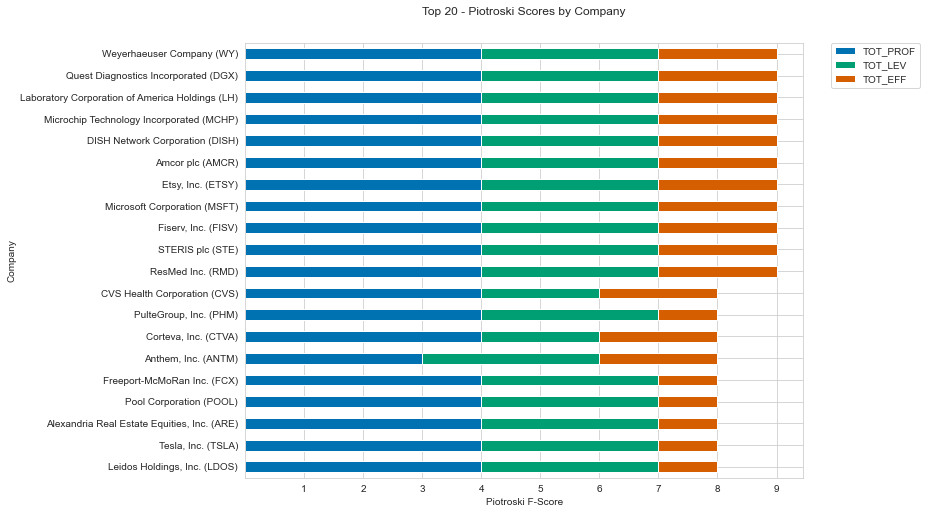

In [356]:
summary_best = summary.sort_values('TOT_PIOTROSKI', ascending = False).head(number_stocks)
#summary_worst = summary.sort_values('TOT_PIOTROSKI', ascending = False).tail(number_stocks)

summary_best.sort_values('TOT_PIOTROSKI', ascending = True).plot(y=['TOT_PROF', 'TOT_LEV', 'TOT_EFF'], x='Company Name', 
                                                                 kind='barh', stacked=True
                                                                 #color=['b','g','r']
                                                                )

#plt.annotate(s=str('TOT_PROF'), xy=('Company Name', 'TOT_PROF'))

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.xlabel('Piotroski F-Score')
plt.ylabel('Company')
plt.title('Top ' + str(number_stocks) + ' - Piotroski Scores by Company', y=1.05)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.gcf().set_size_inches(10, 8)

plt.show()

In [357]:
print("Number of Companies by Piotroski Score")
summary.groupby('TOT_PIOTROSKI')['Ticker'].count().reset_index(name="Number of Companies")

Number of Companies by Piotroski Score


,TOT_PIOTROSKI,Number of Companies
0,1,2
1,2,11
2,3,27
3,4,69
4,5,109
5,6,128
6,7,85
7,8,39
8,9,11


## Distribution of Piotroski Score for the Companies in the SP500 <a name="piotroski_distribution"></a>

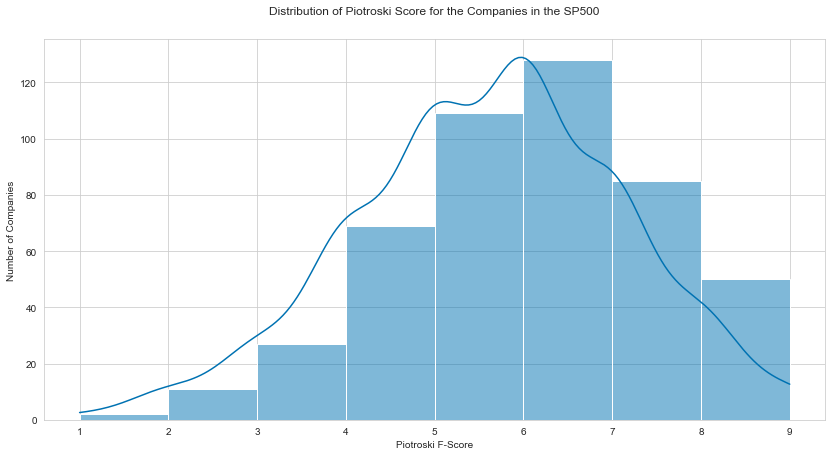

In [358]:
sns.histplot(data=summary, x='TOT_PIOTROSKI', kde=True, bins=[1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.xlabel('Piotroski F-Score')
plt.ylabel('Number of Companies')
plt.title('Distribution of Piotroski Score for the Companies in the SP500', y=1.05)

plt.gcf().set_size_inches(14, 7)
plt.show()

## Enrich dataframe with Sector, Industry and Country to check for possible correlations <a name="enrich_summary"></a>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightgreen">
    <font size=4><b> Analyse possible correlation between Sector and Piotroski Score </b></font> <br>
</div>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Enrich the dataframe containing all the Piotroski scores adding Sector and Industry </b></font> <br>
</div>

In [359]:
# Import file that contains info about the companies in the SP500 (e.g. Sector, Industry)
sp500_stocks_info = pd.read_csv("Datasets\sp500_companies.csv")
write_log('', '', 'Main', 'Completed', 'SP500 stocks info uploaded', datetime.datetime.now())

In [360]:
sp500_stocks_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             497 non-null    object 
 1   Symbol               497 non-null    object 
 2   Shortname            497 non-null    object 
 3   Longname             497 non-null    object 
 4   Sector               497 non-null    object 
 5   Industry             497 non-null    object 
 6   Currentprice         497 non-null    float64
 7   Marketcap            497 non-null    int64  
 8   Ebitda               467 non-null    float64
 9   Revenuegrowth        496 non-null    float64
 10  City                 497 non-null    object 
 11  State                478 non-null    object 
 12  Country              497 non-null    object 
 13  Fulltimeemployees    467 non-null    float64
 14  Longbusinesssummary  497 non-null    object 
 15  Weight               497 non-null    flo

In [361]:
sp500_stocks_info.isnull().sum()

Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 30
Revenuegrowth           1
City                    0
State                  19
Country                 0
Fulltimeemployees      30
Longbusinesssummary     0
Weight                  0
dtype: int64

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:cyan">
    <font size=4> There are some null values but on columns we are not really interested in for the purpose of this analysis (mainly Sector and Industry) </font> <br>
</div>

In [362]:
# Merge to add Sector and Industry to the dataframe with Piotroski Score
summary = summary.merge(sp500_stocks_info[['Symbol', 'Sector', 'Industry', 'Country']], 
                        left_on='Ticker', right_on='Symbol', how='left')

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:cyan">
    <font size=4> Added some commands to check if there are null values, show them, and drop them in case it is needed</font> <br>
</div>

In [363]:
summary.isnull().sum()

Fiscal Year      0
Ticker           0
Company Name     0
PE ratio         0
Market Cap       0
ROA              0
CFO              0
ΔROA             0
ACCRUAL          0
TOT_PROF         0
ΔLEV             0
ΔCURR_RAT        0
ΔSHARES          0
TOT_LEV          0
ΔMARGIN          0
ΔTURN            0
TOT_EFF          0
TOT_PIOTROSKI    0
Symbol           0
Sector           0
Industry         0
Country          0
dtype: int64

In [364]:
#checking if the company info file contains info for all the SP500 tickers we downloaded from yahoo 
summary[summary['Symbol'].isna()]

,Fiscal Year,Ticker,Company Name,PE ratio,Market Cap,ROA,CFO,ΔROA,ACCRUAL,TOT_PROF,...,ΔSHARES,TOT_LEV,ΔMARGIN,ΔTURN,TOT_EFF,TOT_PIOTROSKI,Symbol,Sector,Industry,Country


In [365]:
# Drop rows where we don't have a match (Sector is NaN) - if any
summary.dropna(subset=['Symbol'], inplace = True)

In [366]:
summary.isnull().sum()

Fiscal Year      0
Ticker           0
Company Name     0
PE ratio         0
Market Cap       0
ROA              0
CFO              0
ΔROA             0
ACCRUAL          0
TOT_PROF         0
ΔLEV             0
ΔCURR_RAT        0
ΔSHARES          0
TOT_LEV          0
ΔMARGIN          0
ΔTURN            0
TOT_EFF          0
TOT_PIOTROSKI    0
Symbol           0
Sector           0
Industry         0
Country          0
dtype: int64

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Possible relation between Piotroski score and Sector</b></font> <br>
</div>

In [367]:
sector_list = sorted(summary["Sector"].unique())

In [368]:
summary.groupby("Sector")["TOT_PIOTROSKI"].agg(['count', min, max, np.mean, np.median])

,count,min,max,mean,median
Sector,,,,,
Basic Materials,21,4,8,6.142857,6.0
Communication Services,24,2,9,5.541667,5.5
Consumer Cyclical,59,1,9,5.372881,6.0
Consumer Defensive,34,3,8,5.705882,6.0
Energy,20,2,6,4.150000,4.0
Financial Services,66,2,8,4.969697,5.0
Healthcare,62,4,9,6.274194,6.0
Industrials,68,1,8,5.544118,6.0
Real Estate,29,2,9,5.655172,6.0


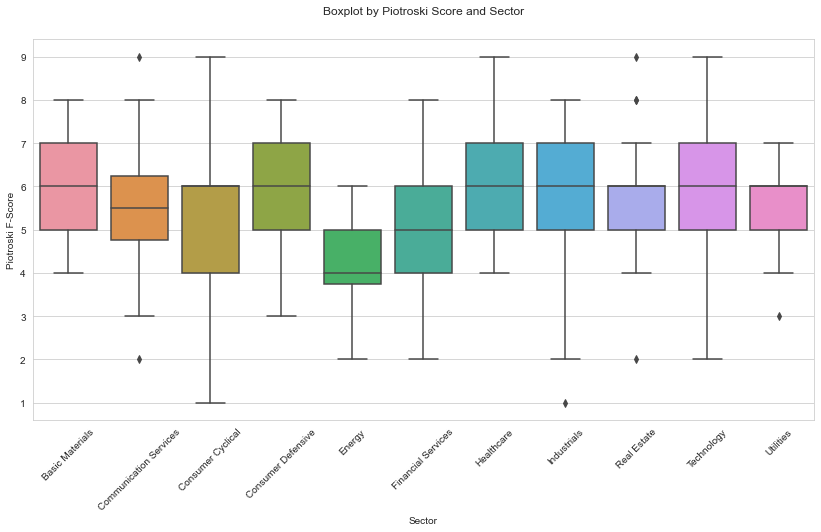

In [369]:
# Boxplot for the "Sector"
sns.boxplot(data=summary, x="Sector", y="TOT_PIOTROSKI", order=sector_list)
#sns.violinplot(data=summary, x="Sector", y="TOT_PIOTROSKI")

plt.title('Boxplot by Piotroski Score and Sector', y=1.05)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Sector')
plt.ylabel('Piotroski F-Score')

plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xticks(rotation=45)

plt.gcf().set_size_inches(14, 7)
plt.show()

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Possible relation between Piotroski score and Industry </b></font> <br>
</div>

In [370]:
industry_list = sorted(summary["Industry"].unique())

In [371]:
summary.groupby("Industry")["TOT_PIOTROSKI"].agg(['count', min, max, np.mean, np.median])

,count,min,max,mean,median
Industry,,,,,
Advertising Agencies,2,5,5,5.000000,5.0
Aerospace & Defense,9,2,7,5.444444,6.0
Agricultural Inputs,4,6,8,7.000000,7.0
Airlines,5,1,3,2.200000,2.0
Apparel Manufacturing,5,5,6,5.600000,6.0
...,...,...,...,...,...
Utilities—Independent Power Producers,1,6,6,6.000000,6.0
Utilities—Regulated Electric,20,4,7,5.650000,6.0
Utilities—Regulated Gas,2,3,6,4.500000,4.5


In [372]:
#There are 112 Industries in this file so try to visualize the distribution by Industry might be messy 
# Let's try to reduce the number of Industries (e.g. replacing all the Industry starting with Utilities* with just Utilitites 

# Replace some char like '—', ',' and take only the first word before blank
# summary["Industry_substr"] = summary["Industry"].str.replace('—',' ')
# summary["Industry_substr"] = summary["Industry"].str.replace(',',' ')
# summary["Industry_substr"] = summary["Industry_substr"].str.split().str.get(0)

# print("Industry: " + str(summary["Industry"].nunique()))
# print("Industry_substr: " + str(summary["Industry_substr"].nunique()))

#industry_list = sorted(summary["Industry_substr"].unique())

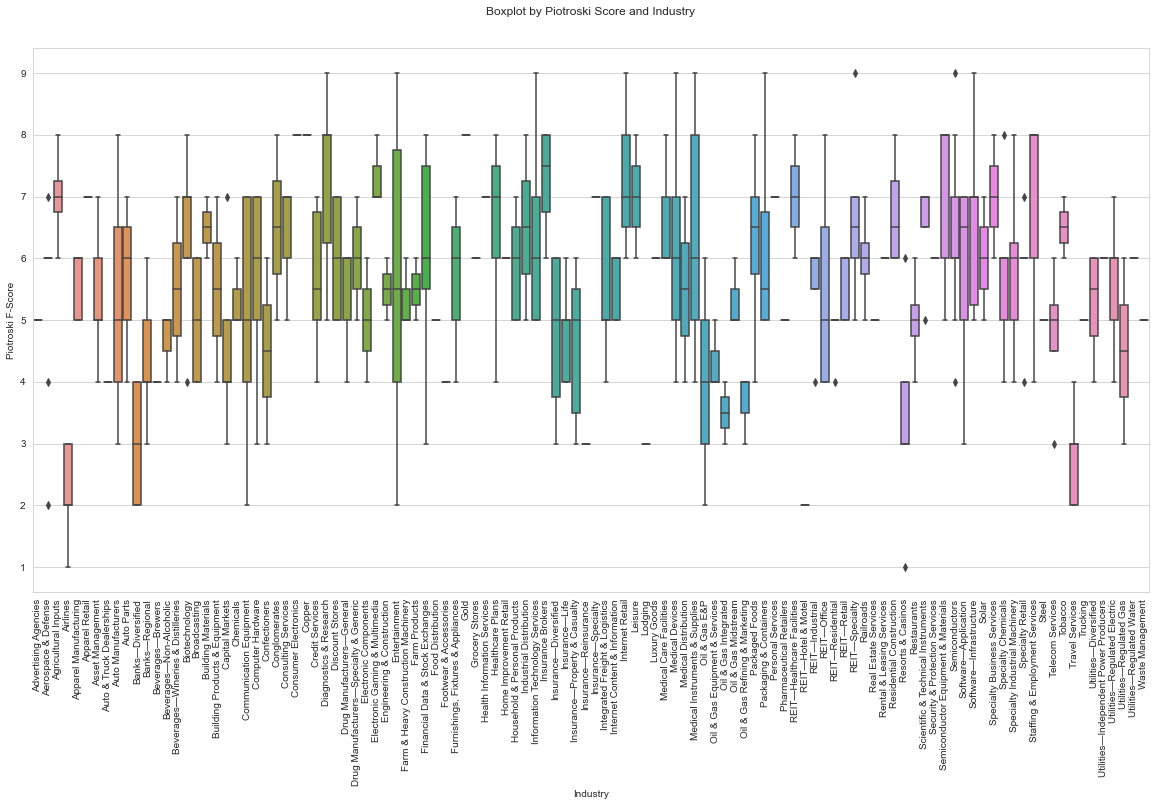

In [373]:
# Boxplot for the "Industry"

sns.boxplot(data=summary, x="Industry", y="TOT_PIOTROSKI", order=industry_list)
#sns.violinplot(data=summary, x="Industry", y="TOT_PIOTROSKI")

#sns.boxplot(data=summary, x="Industry_substr", y="TOT_PIOTROSKI", order=industry_list)
#sns.violinplot(data=summary, x="Industry_substr", y="TOT_PIOTROSKI")

plt.title('Boxplot by Piotroski Score and Industry', y=1.05)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Industry')
plt.ylabel('Piotroski F-Score')

plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xticks(rotation=90)

plt.gcf().set_size_inches(20, 10)
plt.show()

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Possible relation between Piotroski score and Country </b></font> <br>
</div>

In [374]:
country_list = sorted(summary["Country"].unique())

In [375]:
summary.groupby("Country")["TOT_PIOTROSKI"].agg(['count', min, max, np.mean, np.median])

,count,min,max,mean,median
Country,,,,,
Bermuda,1,3,3,3.000000,3.0
Ireland,10,6,9,6.600000,6.0
Israel,1,5,5,5.000000,5.0
Netherlands,1,5,5,5.000000,5.0
Switzerland,4,4,9,5.500000,4.5
United Kingdom,2,6,7,6.500000,6.5
United States,462,1,9,5.597403,6.0


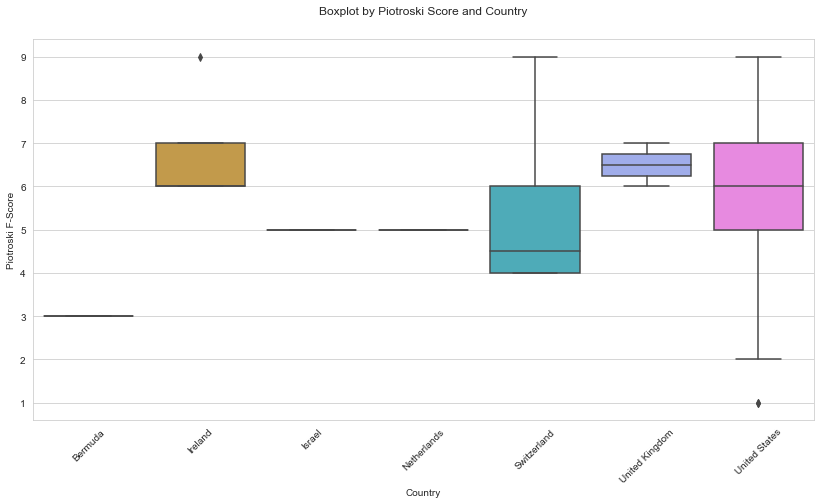

In [376]:
# Boxplot for the "Country"
sns.boxplot(data=summary, x="Country", y="TOT_PIOTROSKI", order=country_list)
#sns.violinplot(data=summary, x="Country", y="TOT_PIOTROSKI")

plt.title('Boxplot by Piotroski Score and Country', y=1.05)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Country')
plt.ylabel('Piotroski F-Score')

plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xticks(rotation=45)

plt.gcf().set_size_inches(14, 7)
plt.show()

## Analyse returns by Piotroski Score <a name="return_by_piotroski_score"></a>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:center;background-color:lightgreen">
    <font size=5><b> Compare the companies with the strongest Piotroski Score vs the SP500 </b></font>
</div>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Upload data for SP500 index and stocks </b></font> <br>
</div>

In [377]:
# Import data from csv containing SP500 and stock prices from 2012
sp500_index = pd.read_csv("Datasets\sp500_index.csv", parse_dates=['Date'])
write_log('', '', 'Main', 'Completed', 'SP500 index share prices uploaded', datetime.datetime.now())

sp500_stocks = pd.read_csv("Datasets\sp500_stocks.csv", parse_dates=['Date'])
write_log('', '', 'Main', 'Completed', 'SP500 stocks share prices uploaded', datetime.datetime.now())

# Converting a column to datetime type - Not needed, done directly in the pd.read_csv command
#sp500_index['Date'] = pd.to_datetime(sp500_index['Date'])
#sp500_stocks['Date'] = pd.to_datetime(sp500_stocks['Date'])

In [378]:
# Columns to use for the Close share price in the df sp500_stocks ("Close" or "Adj Close")
#close_price_col = "Close"
close_price_col = "Adj Close"

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Run standard checks </b></font> <br>
</div>

In [379]:
sp500_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2518 non-null   datetime64[ns]
 1   S&P500  2518 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.5 KB


In [380]:
sp500_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674856 entries, 0 to 674855
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       674856 non-null  datetime64[ns]
 1   Symbol     674856 non-null  object        
 2   Adj Close  666201 non-null  float64       
 3   Close      666201 non-null  float64       
 4   High       666201 non-null  float64       
 5   Low        666201 non-null  float64       
 6   Open       666201 non-null  float64       
 7   Volume     666201 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 41.2+ MB


In [381]:
print(sp500_index.iloc[0]['Date'])
print(sp500_stocks.iloc[0]['Date'])

2012-04-23 00:00:00
2017-01-03 00:00:00


In [382]:
print(sp500_index.iloc[-1]['Date'])
print(sp500_stocks.iloc[-1]['Date'])

2022-04-22 00:00:00
2022-04-22 00:00:00


<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:cyan">
    <font size=4> Same end date but different start date, we will subset these dataframes to include only some years (included in both dataframes </font> <br>
</div>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Subset the dataframe to analyse only the share prices of the year we are interested in </b></font> <br>
    <font size=2><b> Year for which we calculated the Piotroski scores and the next one </b></font> <br> 
</div>

In [383]:
# Subset to analyse only a limited number of years
sp500_index = sp500_index.loc[(sp500_index['Date'].dt.year >= year_to_analyze) & (sp500_index['Date'].dt.year <= year_to_analyze + 1), ['Date','S&P500']]
sp500_stocks = sp500_stocks.loc[(sp500_stocks['Date'].dt.year >= year_to_analyze) & (sp500_stocks['Date'].dt.year <= year_to_analyze + 1), ['Date','Symbol', close_price_col]]

In [384]:
print(sp500_index.iloc[0]['Date'])
print(sp500_stocks.iloc[0]['Date'])

2020-01-02 00:00:00
2020-01-02 00:00:00


In [385]:
print(sp500_index.iloc[-1]['Date'])
print(sp500_stocks.iloc[-1]['Date'])

2021-12-31 00:00:00
2021-12-31 00:00:00


<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:cyan">
    <font size=4> Same start and end date now </font> <br>
</div>

In [386]:
sp500_index.isnull().sum()

Date      0
S&P500    0
dtype: int64

In [387]:
sp500_stocks.isnull().sum()

Date           0
Symbol         0
Adj Close    955
dtype: int64

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:cyan">
    <font size=4> There are null values for some columns, we will take care of that later in the merged dataframe </font> <br>
</div>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Annualized average return of stocks by Piotroski Score </b></font> <br>
</div>

In [388]:
sp500_stocks.set_index("Date", inplace = True)
sp500_index.set_index("Date", inplace = True)

In [389]:
# Pivot the df that contains the share prices of all the SP500 stocks to have dates in row and all stocks in column
sp500_stocks_pivot = sp500_stocks.pivot_table(values=close_price_col, index="Date", columns="Symbol")

In [390]:
#sp500_stocks_pivot

In [391]:
# Merge with the df that contains the share prices for the SP500 index
sp500_stocks_pivot = pd.merge_ordered(sp500_stocks_pivot, sp500_index['S&P500'], on='Date', how='inner')

In [392]:
sp500_stocks_pivot.set_index("Date", inplace = True)

In [393]:
sp500_stocks_pivot.isna().sum()

A         0
AAL       0
AAP       0
AAPL      0
ABBV      0
         ..
ZBH       0
ZBRA      0
ZION      0
ZTS       0
S&P500    0
Length: 504, dtype: int64

In [394]:
sp500_stocks_pivot.shape

(505, 504)

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:cyan">
    <font size=4> Remove columns (stocks) where we have null values for share prices </font> <br>
</div>

In [395]:
# axis 1 to delete columns (stocks) with NaN
sp500_stocks_pivot = sp500_stocks_pivot.dropna(axis = 1)
sp500_stocks_pivot.shape

(505, 501)

In [396]:
#sp500_stocks_pivot

In [397]:
# New df to contain the daily % changes for each stock
sp500_stocks_returns = sp500_stocks_pivot.pct_change()

In [398]:
#sp500_stocks_returns.to_csv("sp500_stocks_returns.csv")

In [399]:
# number of dates for each year in the dataframe
sp500_stocks_returns.groupby([sp500_stocks_returns.index.year]).count()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,S&P500
Date,,,,,,,,,,,,,,,,,,,,,
2020,252,252,252,252,252,252,252,252,252,252,...,252,252,252,252,252,252,252,252,252,252
2021,252,252,252,252,252,252,252,252,252,252,...,252,252,252,252,252,252,252,252,252,252


<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:cyan">
    <font size=4> To confirm the 252 trading days used below is correct to calculate annualized returns </font> <br>
</div>

In [400]:
# New df to contain the annualized returns (avg daily return * 252 trading days per year)
annualized_sp500_stocks_returns = pd.DataFrame(sp500_stocks_returns.mean()*252)

annualized_sp500_stocks_returns = annualized_sp500_stocks_returns.reset_index() 
annualized_sp500_stocks_returns.columns = ['Ticker','Annualized Avg Return']
annualized_sp500_stocks_returns

,Ticker,Annualized Avg Return
0,A,0.360015
1,AAL,0.075223
2,AAP,0.288672
3,AAPL,0.506714
4,ABBV,0.297960
...,...,...
496,ZBH,0.004060
497,ZBRA,0.497144
498,ZION,0.236135
499,ZTS,0.353218


In [401]:
# Add to the df the info contained in the df used at the beginning to calculate the Piotroski scores
annualized_sp500_stocks_returns = pd.merge(annualized_sp500_stocks_returns, 
                                           summary[['Ticker', 'Company Name', 'Market Cap', 'TOT_PIOTROSKI','Symbol','Sector','Industry']], 
                                           how='left', on='Ticker')

In [402]:
#annualized_sp500_stocks_returns

In [403]:
# check if there is some stocks with no match between the two dataframes
annualized_sp500_stocks_returns[annualized_sp500_stocks_returns['TOT_PIOTROSKI'].isna()]

,Ticker,Annualized Avg Return,Company Name,Market Cap,TOT_PIOTROSKI,Symbol,Sector,Industry
2,AAP,0.288672,NaN,NaN,NaN,NaN,NaN,NaN
40,APA,0.537812,NaN,NaN,NaN,NaN,NaN,NaN
49,AVY,0.346949,NaN,NaN,NaN,NaN,NaN,NaN
85,CDNS,0.560338,NaN,NaN,NaN,NaN,NaN,NaN
141,DPZ,0.396607,NaN,NaN,NaN,NaN,NaN,NaN
181,FDS,0.366959,NaN,NaN,NaN,NaN,NaN,NaN
206,GPC,0.250652,NaN,NaN,NaN,NaN,NaN,NaN
235,ILMN,0.157519,NaN,NaN,NaN,NaN,NaN,NaN
253,JNJ,0.133274,NaN,NaN,NaN,NaN,NaN,NaN
256,K,0.045952,NaN,NaN,NaN,NaN,NaN,NaN


In [404]:
#summary[summary['Ticker'] == 'TSLA']
#annualized_sp500_stocks_returns[annualized_sp500_stocks_returns['Ticker'] == 'TSLA']

In [405]:
# check SP500 index record
annualized_sp500_stocks_returns[annualized_sp500_stocks_returns['Ticker'] == 'S&P500']

,Ticker,Annualized Avg Return,Company Name,Market Cap,TOT_PIOTROSKI,Symbol,Sector,Industry
500,S&P500,0.224499,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
# Updating the TOT_PIOTROSKI column to SP500 so we can see how it performance against the Grouped stocks by TOT_PIOTROSKI
annualized_sp500_stocks_returns.loc[annualized_sp500_stocks_returns['Ticker'] == 'S&P500', 'TOT_PIOTROSKI'] = 'SP500'

# Updating the TOT_PIOTROSKI column to zNoScore for all the stocks for which we don't have a Piotroski Score
annualized_sp500_stocks_returns.loc[annualized_sp500_stocks_returns['TOT_PIOTROSKI'].isna(), 'TOT_PIOTROSKI'] = 'zNoScore'

# Drop the rows for the stocks without a Piotroski score, we could report it in a separate group zNoScore but it will not add any value
annualized_sp500_stocks_returns = annualized_sp500_stocks_returns[annualized_sp500_stocks_returns['TOT_PIOTROSKI'] != 'zNoScore']


In [407]:
#annualized_sp500_stocks_returns

In [408]:
# Sorted by Annualized Avg Return
annualized_sp500_stocks_returns.sort_values('Annualized Avg Return', ascending = False)

,Ticker,Annualized Avg Return,Company Name,Market Cap,TOT_PIOTROSKI,Symbol,Sector,Industry
311,MRNA,1.703305,"Moderna, Inc. (MRNA)",5.416600e+10,7.0,MRNA,Healthcare,Biotechnology
443,TSLA,1.532392,"Tesla, Inc. (TSLA)",8.968220e+11,8.0,TSLA,Consumer Cyclical,Auto Manufacturers
159,ENPH,1.285045,"Enphase Energy, Inc. (ENPH)",2.445900e+10,7.0,ENPH,Technology,Solar
56,BBWI,1.080231,"Bath & Body Works, Inc. (BBWI)",1.259700e+10,4.0,BBWI,Consumer Cyclical,Specialty Retail
168,ETSY,1.002012,"Etsy, Inc. (ETSY)",1.098600e+10,9.0,ETSY,Consumer Cyclical,Internet Retail
...,...,...,...,...,...,...,...,...
207,GPN,-0.053284,Global Payments Inc. (GPN),3.406600e+10,8.0,GPN,Industrials,Specialty Business Services
218,HII,-0.068946,"Huntington Ingalls Industries, Inc. (HII)",8.804000e+09,6.0,HII,Industrials,Aerospace & Defense
425,T,-0.082982,AT&T Inc. (T),1.433950e+11,3.0,T,Communication Services,Telecom Services
471,VTRS,-0.129298,Viatris Inc. (VTRS),1.206200e+10,5.0,VTRS,Healthcare,Drug Manufacturers—Specialty & Generic


## Annualized Avg Return by Piotroski Score Group<a name="ann_returns_by_pgroup"></a>

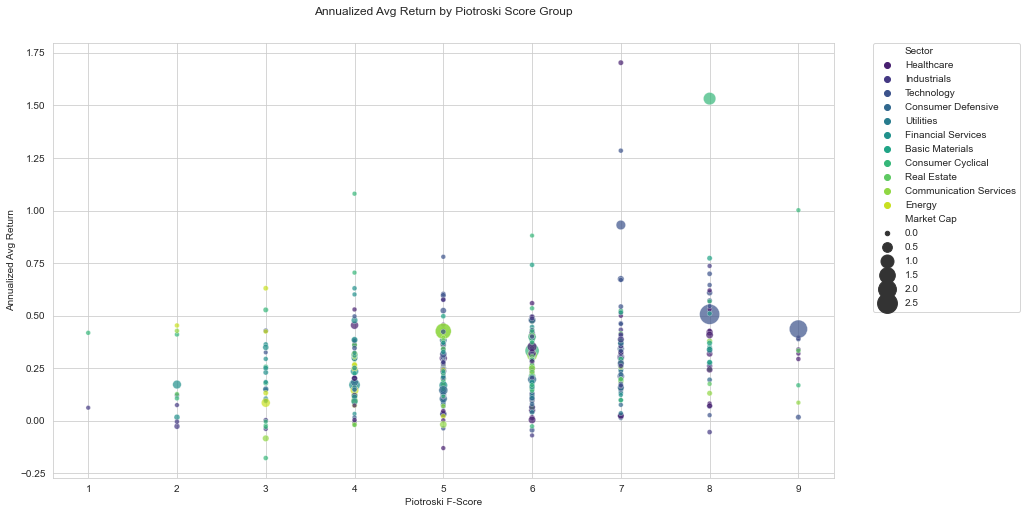

In [409]:
# sns.scatterplot(data=summary, x='Market Cap', y='TOT_PIOTROSKI', hue='Sector', size='Market Cap')

# use the scatterplot function to build the bubble map
sns.scatterplot(data=annualized_sp500_stocks_returns, x="TOT_PIOTROSKI", y="Annualized Avg Return", 
                size="Market Cap", hue="Sector", 
                palette="viridis", alpha=0.7, 
                legend=True, sizes=(20, 400))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Annualized Avg Return by Piotroski Score Group", y=1.05)

plt.xlabel('Piotroski F-Score')
plt.ylabel('Annualized Avg Return')

plt.xticks(rotation=0)

plt.gcf().set_size_inches(14, 8)

plt.show()

In [410]:
# Group by to get the Average Return for stocks by Piotroski Score (0 to 9)
annualized_sp500_stocks_returns_byscore = pd.DataFrame(annualized_sp500_stocks_returns.groupby('TOT_PIOTROSKI')['Annualized Avg Return'].mean())

annualized_sp500_stocks_returns_byscore = annualized_sp500_stocks_returns_byscore.reset_index()
annualized_sp500_stocks_returns_byscore

,TOT_PIOTROSKI,Annualized Avg Return
0,1.0,0.240738
1,2.0,0.171382
2,3.0,0.182239
3,4.0,0.252358
4,5.0,0.243146
5,6.0,0.259163
6,7.0,0.321824
7,8.0,0.397771
8,9.0,0.344034
9,SP500,0.224499


## Annualized Avg Return by Piotroski Score Group vs SP500 <a name="ann_returns_by_pgroup_vs_SP"></a>

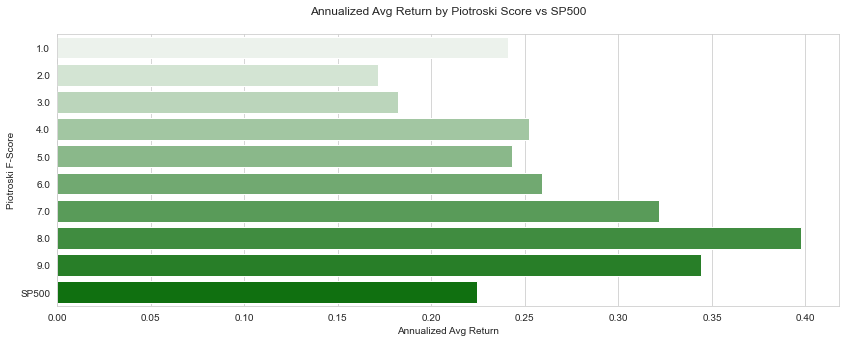

In [411]:
#pal = sns.color_palette("Greens_d", len(annualized_sp500_stocks_returns_byscore['TOT_PIOTROSKI']))
pal = sns.color_palette("light:g", len(annualized_sp500_stocks_returns_byscore['TOT_PIOTROSKI']))

# plot a bar chart
sns.barplot(
    data=annualized_sp500_stocks_returns_byscore, 
    x="Annualized Avg Return", 
    y="TOT_PIOTROSKI", 
    palette=pal
    #estimator=sum, 
    #ci=None
    #color=palette_colors
    #edgecolor='lightgreen'
);

plt.title("Annualized Avg Return by Piotroski Score vs SP500", y=1.05)

plt.xlabel('Annualized Avg Return')
plt.ylabel('Piotroski F-Score')


plt.gcf().set_size_inches(14, 5)
plt.show()

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:cyan">
    <font size=4> Check why the annualized return is so high for the group with Piotroski score 1 </font> <br>
</div>

In [412]:
# Check why the annualized return is so high for the group with Piotroski score 1
annualized_sp500_stocks_returns[annualized_sp500_stocks_returns['TOT_PIOTROSKI'] == 1]

,Ticker,Annualized Avg Return,Company Name,Market Cap,TOT_PIOTROSKI,Symbol,Sector,Industry
24,ALK,0.062653,"Alaska Air Group, Inc. (ALK)",6.332000e+09,1.0,ALK,Industrials,Airlines
297,MGM,0.418824,MGM Resorts International (MGM),1.674400e+10,1.0,MGM,Consumer Cyclical,Resorts & Casinos


## Create Portfolio with top stocks based on Piotroski Score <a name="create_portfolio"></a>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightgreen">
    <font size=4><b> Portfolio with top stocks based on Piotroski Score </b></font> <br>
</div>

In [413]:
# Based on the variable set at the beginning decide if we pick the stocks with highest or lowest score 
if number_stocks_direction == 'worst':
    summary_top = summary.sort_values('TOT_PIOTROSKI', ascending = False).tail(number_stocks)[['Ticker', 'Company Name', 'Sector', 'TOT_PIOTROSKI']]
else:
    summary_top = summary.sort_values('TOT_PIOTROSKI', ascending = False).head(number_stocks)[['Ticker', 'Company Name', 'Sector', 'TOT_PIOTROSKI']]


# Calculate a column to define the weight of each stock in our portfolio based on their Piotroski Score
summary_top['Portfolio_Weights'] = summary_top['TOT_PIOTROSKI'] / summary_top['TOT_PIOTROSKI'].sum()

summary_top

,Ticker,Company Name,Sector,TOT_PIOTROSKI,Portfolio_Weights
404,STE,STERIS plc (STE),Healthcare,9,0.052632
261,LH,Laboratory Corporation of America Holdings (LH),Healthcare,9,0.052632
282,MCHP,Microchip Technology Incorporated (MCHP),Technology,9,0.052632
133,DISH,DISH Network Corporation (DISH),Communication Services,9,0.052632
27,AMCR,Amcor plc (AMCR),Consumer Cyclical,9,0.052632
164,ETSY,"Etsy, Inc. (ETSY)",Consumer Cyclical,9,0.052632
306,MSFT,Microsoft Corporation (MSFT),Technology,9,0.052632
181,FISV,"Fiserv, Inc. (FISV)",Technology,9,0.052632
129,DGX,Quest Diagnostics Incorporated (DGX),Healthcare,9,0.052632
471,WY,Weyerhaeuser Company (WY),Real Estate,9,0.052632


In [414]:
# check that we didn't pick too many stocks from the same industry
summary_top.groupby("Sector")["Company Name"].count()

Sector
Basic Materials           2
Communication Services    1
Consumer Cyclical         5
Healthcare                6
Real Estate               2
Technology                4
Name: Company Name, dtype: int64

In [415]:
# Get the info needed to create our Portfolio: Tickers and Weights 
portfolio_tickers = summary_top.sort_values('TOT_PIOTROSKI', ascending = False)['Ticker'].to_list()
portfolio_weights = summary_top.sort_values('TOT_PIOTROSKI', ascending = False)['Portfolio_Weights'].to_list()

In [416]:
print(portfolio_tickers)

['STE', 'MSFT', 'LH', 'WY', 'DGX', 'FISV', 'RMD', 'ETSY', 'AMCR', 'DISH', 'MCHP', 'PHM', 'CTVA', 'ANTM', 'FCX', 'POOL', 'ARE', 'TSLA', 'CVS', 'LDOS']


In [417]:
print(portfolio_weights)

[0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.04678362573099415, 0.04678362573099415, 0.04678362573099415, 0.04678362573099415, 0.04678362573099415, 0.04678362573099415, 0.04678362573099415, 0.04678362573099415, 0.04678362573099415]


In [418]:
type(portfolio_weights)

list

In [419]:
# Transform this into an array so we can use it with numpy to Calculate the weighted stock prices
portfolio_weights = np.asarray(portfolio_weights)

In [420]:
type(portfolio_weights)

numpy.ndarray

## Portfolio with the top stocks based on their Piotroski Score  <a name="portfolio_creation"></a>

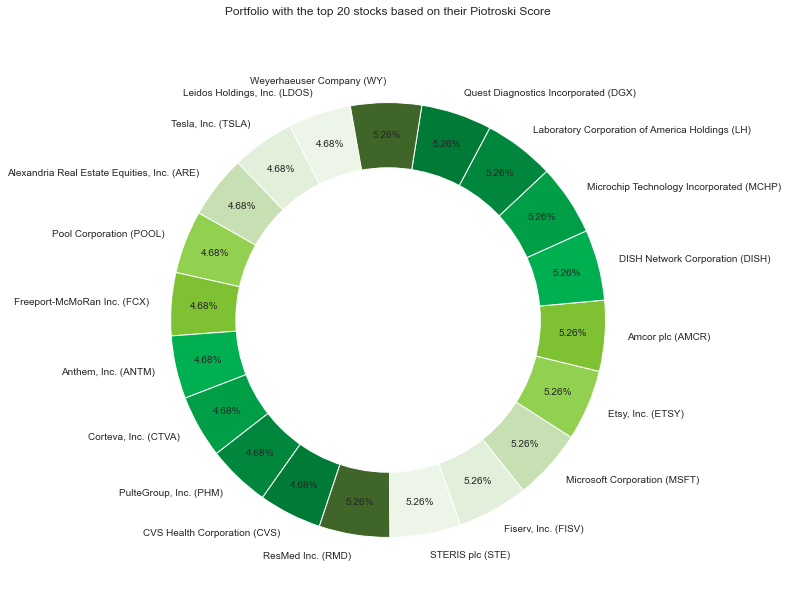

In [421]:
x = summary_top.sort_values('Portfolio_Weights', ascending = True)['Company Name']
y = summary_top.sort_values('Portfolio_Weights', ascending = True)['Portfolio_Weights']

fig, ax = plt.subplots()

colors = ['#ECF5E7', '#E2EFDA', '#C6E0B4', '#92D050', '#7EC234', '#00B050', '#009E47', '#00863D', '#007A37', '#406529']

ax.pie(y, labels = x, 
       colors = colors,
       autopct='%1.2f%%',
       startangle = 100,
       normalize=True,
       pctdistance=0.85, labeldistance=1.1)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Portfolio with the top ' + str(number_stocks) + ' stocks based on their Piotroski Score', y=1.05)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.gcf().set_size_inches(20, 10)

plt.show()

In [422]:
# import squarify

# squarify.plot(sizes=summary_top['Portfolio_Weights'], label=summary_top['Company Name'], alpha=.9)
# plt.axis('off')

# plt.gcf().set_size_inches(14, 12)
# plt.show()

## Performance of our Portfolio compared to SP500 <a name="sp500_vs_portfolio"></a>

In [423]:
# Resetting the index after using the Date as index in the previous analysis
sp500_index = sp500_index.reset_index()
sp500_stocks = sp500_stocks.reset_index()

In [424]:
sp500_index

,Date,S&P500
0,2020-01-02,3257.85
1,2020-01-03,3234.85
2,2020-01-06,3246.28
3,2020-01-07,3237.18
4,2020-01-08,3253.05
...,...,...
500,2021-12-27,4791.19
501,2021-12-28,4786.35
502,2021-12-29,4793.06
503,2021-12-30,4778.73


In [425]:
sp500_stocks
#sp500_stocks[sp500_stocks['Symbol'] == 'AAPL']

,Date,Symbol,Adj Close
0,2020-01-02,MMM,166.588959
1,2020-01-03,MMM,165.154465
2,2020-01-06,MMM,165.311783
3,2020-01-07,MMM,164.645416
4,2020-01-08,MMM,167.172028
...,...,...,...
254515,2021-12-27,ZTS,246.114746
254516,2021-12-28,ZTS,243.858383
254517,2021-12-29,ZTS,246.633926
254518,2021-12-30,ZTS,244.766922


<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Create a new dataframe to contain the share prices for SP500 and the top tickers </b></font> <br>
</div>

In [426]:
share_prices = sp500_index

In [427]:
portfolio_tickers

['STE',
 'MSFT',
 'LH',
 'WY',
 'DGX',
 'FISV',
 'RMD',
 'ETSY',
 'AMCR',
 'DISH',
 'MCHP',
 'PHM',
 'CTVA',
 'ANTM',
 'FCX',
 'POOL',
 'ARE',
 'TSLA',
 'CVS',
 'LDOS']

In [428]:
for ticker in portfolio_tickers:
    
    share_prices = pd.merge_ordered(share_prices, sp500_stocks[sp500_stocks['Symbol'] == ticker][['Date', close_price_col]],
                                    on='Date', how='inner',
                                    suffixes=('', '_' + str(ticker))
                                   )

In [429]:
# replace the 'Close_' from the columns name
share_prices.columns = share_prices.columns.str.replace(close_price_col + '_', '')
# not sure why the suffix doesn't work on the pd.merge_ordered for the first ticker, so replacing it this way
share_prices.columns = share_prices.columns.str.replace(close_price_col, portfolio_tickers[0])

share_prices.columns = share_prices.columns.str.replace('S&P500', 'SP500')

In [430]:
share_prices.set_index("Date", inplace = True)

In [431]:
share_prices

,SP500,STE,MSFT,LH,WY,DGX,FISV,RMD,ETSY,AMCR,...,MCHP,PHM,CTVA,ANTM,FCX,POOL,ARE,TSLA,CVS,LDOS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,3257.85,148.809265,158.205765,167.479996,26.842188,101.081520,115.519997,153.436829,45.189999,9.681847,...,51.769039,37.773914,27.797503,293.308014,13.045310,211.169037,151.911194,86.052002,69.725601,95.802765
2020-01-03,3234.85,147.759628,156.235825,167.229996,26.887856,100.488762,116.370003,152.630859,44.900002,9.554334,...,50.633587,38.105949,27.468651,289.418304,12.649998,212.383835,152.776642,88.601997,69.170883,96.638206
2020-01-06,3246.28,148.730759,156.639694,169.419998,26.833057,101.033707,116.930000,153.358185,44.834999,9.490578,...,49.907085,38.389153,27.429966,292.898560,12.699412,212.423355,153.147537,90.307999,69.443558,97.493065
2020-01-07,3237.18,148.161819,155.211456,169.160004,26.659529,99.876907,116.480003,152.493271,45.779999,9.408605,...,53.255714,38.643066,27.536356,292.011444,12.897068,210.388809,148.135529,93.811996,69.180290,97.133629
2020-01-08,3253.05,148.073532,157.683731,173.839996,26.759993,100.288002,116.800003,153.594101,45.005001,9.445037,...,52.582146,38.994637,27.758818,299.751923,13.025544,211.455460,150.104202,98.428001,68.315308,97.017059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,4791.19,244.511719,342.450012,306.809998,38.111694,168.612152,103.940002,261.613373,229.669998,11.690707,...,89.349998,55.380001,46.883041,459.519989,41.920250,560.909973,218.967850,1093.939941,101.855583,87.870003
2021-12-28,4786.35,243.323990,341.250000,307.000000,38.303886,168.602188,104.699997,260.435455,221.729996,11.740202,...,88.029999,56.279999,47.252045,464.209991,41.920250,561.210022,220.848129,1088.469971,102.223618,88.260002
2021-12-29,4793.06,241.856812,341.950012,308.670013,39.091873,169.368835,104.269997,260.655029,221.910004,11.829292,...,88.239998,57.650002,47.222122,467.670013,41.910267,567.630005,222.419998,1086.189941,103.148666,88.360001


In [432]:
#to spot check that the merge worked
#sp500_stocks[sp500_stocks['Symbol'] == 'STE'][['Date', 'Close']]

In [433]:
share_prices.isnull().sum()

SP500    0
STE      0
MSFT     0
LH       0
WY       0
DGX      0
FISV     0
RMD      0
ETSY     0
AMCR     0
DISH     0
MCHP     0
PHM      0
CTVA     0
ANTM     0
FCX      0
POOL     0
ARE      0
TSLA     0
CVS      0
LDOS     0
dtype: int64

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Create Normalized Stock prices in a new dataframe </b></font> <br>
</div>

In [434]:
# Select first prices
first_prices = share_prices.iloc[0]

# Create normalized
share_prices_normalized = share_prices.div(first_prices).mul(100)

In [435]:
share_prices_normalized

,SP500,STE,MSFT,LH,WY,DGX,FISV,RMD,ETSY,AMCR,...,MCHP,PHM,CTVA,ANTM,FCX,POOL,ARE,TSLA,CVS,LDOS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-03,99.294013,99.294643,98.754824,99.850728,100.170134,99.413584,100.735809,99.474722,99.358271,98.682969,...,97.806696,100.879006,98.816974,98.673848,96.969698,100.575273,100.569707,102.963319,99.204427,100.872043
2020-01-06,99.644858,99.947244,99.010105,101.158349,99.965985,99.952698,101.220571,99.948745,99.214429,98.024458,...,96.403345,101.628738,98.677807,99.860401,97.348490,100.593988,100.813859,104.945843,99.595495,101.764354
2020-01-07,99.365532,99.564916,98.107333,101.003110,99.319507,98.808276,100.831031,99.385051,101.305599,97.177790,...,102.871746,102.300932,99.060540,99.557949,98.863638,99.630520,97.514558,109.017797,99.217919,101.389171
2020-01-08,99.852664,99.505587,99.670029,103.797469,99.693783,99.214972,101.108039,100.102500,99.590623,97.554085,...,101.570643,103.231654,99.860833,102.196977,99.848483,100.135637,98.810495,114.382001,97.977366,101.267494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,147.066010,164.312161,216.458618,183.192026,141.984307,166.808089,89.975767,170.502333,508.231921,120.748734,...,172.593504,146.609114,168.659186,156.668065,321.343455,265.621315,144.142011,1271.254493,146.080609,91.719694
2021-12-28,146.917446,163.514005,215.700105,183.305474,142.700314,166.798232,90.633657,169.734644,490.661656,121.259946,...,170.043718,148.991704,169.986655,158.267067,321.343455,265.763405,145.379760,1264.897906,146.608442,92.126780
2021-12-29,147.123410,162.528060,216.142574,184.302616,145.635942,167.556676,90.261426,169.877748,491.059992,122.180125,...,170.449364,152.618553,169.879010,159.446722,321.266929,268.803615,146.414489,1262.248311,147.935141,92.231159


<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Calculate my Portfolio share price </b></font> <br>
</div>

In [436]:
portfolio_weights

array([0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.04678363, 0.04678363, 0.04678363, 0.04678363,
       0.04678363, 0.04678363, 0.04678363, 0.04678363, 0.04678363])

In [437]:
#add a weigthing 0 at the beginning of the array to not include the first col (SP500) in my portfolio
portfolio_weights = np.insert(portfolio_weights, 0, 0)
portfolio_weights

array([0.        , 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.04678363, 0.04678363, 0.04678363,
       0.04678363, 0.04678363, 0.04678363, 0.04678363, 0.04678363,
       0.04678363])

In [438]:
# Calculate the weighted stock prices
share_prices_normalized_weighted = share_prices_normalized.mul(portfolio_weights, axis=1)

In [439]:
share_prices_normalized_weighted

,SP500,STE,MSFT,LH,WY,DGX,FISV,RMD,ETSY,AMCR,...,MCHP,PHM,CTVA,ANTM,FCX,POOL,ARE,TSLA,CVS,LDOS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.0,5.263158,5.263158,5.263158,5.263158,5.263158,5.263158,5.263158,5.263158,5.263158,...,5.263158,4.678363,4.678363,4.678363,4.678363,4.678363,4.678363,4.678363,4.678363,4.678363
2020-01-03,0.0,5.226034,5.197622,5.255301,5.272112,5.232294,5.301885,5.235512,5.229383,5.193840,...,5.147721,4.719486,4.623016,4.616320,4.536594,4.705276,4.705016,4.816997,4.641143,4.719160
2020-01-06,0.0,5.260381,5.211058,5.324124,5.261368,5.260668,5.327398,5.260460,5.221812,5.159182,...,5.073860,4.754561,4.616506,4.671832,4.554315,4.706151,4.716438,4.909747,4.659438,4.760905
2020-01-07,0.0,5.240259,5.163544,5.315953,5.227342,5.200436,5.306896,5.230792,5.331874,5.114621,...,5.414302,4.786009,4.634411,4.657682,4.625199,4.661077,4.562085,5.100248,4.641774,4.743353
2020-01-08,0.0,5.237136,5.245791,5.463025,5.247041,5.221841,5.321476,5.268553,5.241612,5.134426,...,5.345823,4.829551,4.671852,4.781145,4.671274,4.684708,4.622713,5.351205,4.583736,4.737661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.0,8.648008,11.392559,9.641686,7.472858,8.779373,4.735567,8.973807,26.749048,6.355197,...,9.083869,6.858906,7.890488,7.329500,15.033612,12.426728,6.743486,59.473894,6.834181,4.290980
2021-12-28,0.0,8.606000,11.352637,9.647657,7.510543,8.778854,4.770192,8.933402,25.824298,6.382102,...,8.949669,6.970372,7.952592,7.404307,15.033612,12.433376,6.801392,59.176510,6.858874,4.310025
2021-12-29,0.0,8.554108,11.375925,9.700138,7.665050,8.818772,4.750601,8.940934,25.845263,6.430533,...,8.971019,7.140049,7.947556,7.459496,15.030032,12.575608,6.849801,59.052553,6.920942,4.314908


In [440]:
# Calculate the portfolio share price and add it as a column in the previous df
share_prices_normalized['Portfolio'] = share_prices_normalized_weighted.sum(axis=1)

In [441]:
share_prices_normalized

,SP500,STE,MSFT,LH,WY,DGX,FISV,RMD,ETSY,AMCR,...,PHM,CTVA,ANTM,FCX,POOL,ARE,TSLA,CVS,LDOS,Portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-03,99.294013,99.294643,98.754824,99.850728,100.170134,99.413584,100.735809,99.474722,99.358271,98.682969,...,100.879006,98.816974,98.673848,96.969698,100.575273,100.569707,102.963319,99.204427,100.872043,99.658487
2020-01-06,99.644858,99.947244,99.010105,101.158349,99.965985,99.952698,101.220571,99.948745,99.214429,98.024458,...,101.628738,98.677807,99.860401,97.348490,100.593988,100.813859,104.945843,99.595495,101.764354,99.958637
2020-01-07,99.365532,99.564916,98.107333,101.003110,99.319507,98.808276,100.831031,99.385051,101.305599,97.177790,...,102.300932,99.060540,99.557949,98.863638,99.630520,97.514558,109.017797,99.217919,101.389171,100.191561
2020-01-08,99.852664,99.505587,99.670029,103.797469,99.693783,99.214972,101.108039,100.102500,99.590623,97.554085,...,103.231654,99.860833,102.196977,99.848483,100.135637,98.810495,114.382001,97.977366,101.267494,100.886910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,147.066010,164.312161,216.458618,183.192026,141.984307,166.808089,89.975767,170.502333,508.231921,120.748734,...,146.609114,168.659186,156.668065,321.343455,265.621315,144.142011,1271.254493,146.080609,91.719694,233.555734
2021-12-28,146.917446,163.514005,215.700105,183.305474,142.700314,166.798232,90.633657,169.734644,490.661656,121.259946,...,148.991704,169.986655,158.267067,321.343455,265.763405,145.379760,1264.897906,146.608442,92.126780,232.533985
2021-12-29,147.123410,162.528060,216.142574,184.302616,145.635942,167.556676,90.261426,169.877748,491.059992,122.180125,...,152.618553,169.879010,159.446722,321.266929,268.803615,146.414489,1262.248311,147.935141,92.231159,233.123424


In [442]:
# number of dates for each year in the dataframe
share_prices_normalized.groupby([share_prices_normalized.index.year]).count()

,SP500,STE,MSFT,LH,WY,DGX,FISV,RMD,ETSY,AMCR,...,PHM,CTVA,ANTM,FCX,POOL,ARE,TSLA,CVS,LDOS,Portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2020,253,253,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
2021,252,252,252,252,252,252,252,252,252,252,...,252,252,252,252,252,252,252,252,252,252


<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Create dataframe for monthly and yearly prices </b></font> <br>
</div>

In [443]:
share_prices_normalized_M = share_prices_normalized.resample('M').ffill()

In [444]:
share_prices_normalized_M

,SP500,STE,MSFT,LH,WY,DGX,FISV,RMD,ETSY,AMCR,...,PHM,CTVA,ANTM,FCX,POOL,ARE,TSLA,CVS,LDOS,Portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,99.007628,99.334213,105.983060,104.728922,98.502889,105.194062,102.674865,101.832037,108.010628,99.623705,...,115.434340,100.626312,88.170969,84.402821,102.567697,102.172404,151.203918,92.068091,101.875885,102.819751
2020-02-29,90.680050,104.792489,101.140895,104.902082,88.397423,100.812147,94.667593,102.053923,127.926539,87.676386,...,103.929670,94.641619,85.448871,75.734416,98.667037,95.085465,155.252643,80.338976,104.086394,99.208972
2020-03-31,79.334223,92.471323,98.456459,75.465729,58.372749,76.326770,82.228186,94.561647,85.063067,77.295548,...,57.900846,82.160242,75.742003,51.326040,92.264488,86.427770,121.786827,80.542613,93.302190,79.930405
2020-04-30,89.397302,94.142774,111.878660,98.190829,75.316330,105.467064,89.213989,99.716995,143.549468,85.386832,...,73.335878,91.564981,93.653339,67.142062,99.246342,99.058374,181.722683,84.255549,100.591261,97.187832
2020-05-31,93.445370,109.595417,114.719392,104.681163,69.530720,113.292563,92.425554,103.489516,179.198951,98.321282,...,88.122383,96.017105,98.116983,68.966991,126.481205,96.933300,194.068698,89.758525,107.188092,106.461270
2020-06-30,95.163682,101.605806,127.402687,99.181995,77.348187,109.154736,84.504852,123.554204,235.074146,98.321282,...,88.570657,94.188878,88.009968,87.976628,127.821155,102.986756,250.966858,88.937178,95.682731,113.858032
2020-07-31,100.407324,105.704730,128.341724,115.189875,95.772611,122.290487,86.383314,130.317506,261.960613,99.187985,...,113.478745,100.411887,91.631035,98.241845,148.898251,112.698294,332.533819,86.831221,97.204736,125.346248
2020-08-31,107.442332,105.985595,141.529081,104.937906,104.382167,107.055899,86.201528,116.582422,264.881612,106.506699,...,116.055434,100.874207,94.214627,118.696215,154.419028,106.877711,579.091707,85.699957,92.434399,138.373301
2020-09-30,103.227589,116.973208,131.990477,112.413428,98.217734,110.183654,89.205338,110.552729,269.152469,107.510368,...,120.798933,101.792849,90.208152,118.924331,157.574867,102.230190,498.547390,80.567900,91.422196,133.461555


In [445]:
share_prices_normalized_Y = share_prices_normalized.resample('Y').ffill()

In [446]:
share_prices_normalized_Y

,SP500,STE,MSFT,LH,WY,DGX,FISV,RMD,ETSY,AMCR,...,PHM,CTVA,ANTM,FCX,POOL,ARE,TSLA,CVS,LDOS,Portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,115.292908,126.093581,139.942862,121.536905,116.154750,115.254431,98.563023,137.319668,393.693315,115.659567,...,112.901722,137.294575,108.158792,197.852372,175.771083,114.584700,820.050629,95.025284,108.148030,170.985160
2021-12-31,146.298326,163.259134,212.583914,187.610461,147.425961,170.413143,89.845918,169.467888,484.487739,122.793591,...,151.321357,169.627876,158.038644,319.353719,268.031719,146.769965,1228.071405,147.164811,92.794818,231.057392


In [447]:
# share_prices_normalized.to_csv('share_prices_normalized.csv')
# share_prices_normalized_M.to_csv('share_prices_normalized_M.csv')
# share_prices_normalized_Y.to_csv('share_prices_normalized_Y.csv')

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> Calculate the daily % change (cumulative) </b></font> <br>
    <font size=2><b> In this case in a new dataframe </b></font> <br>
</div>

In [448]:
# pct_change() vs previous day/month/year
stock_returns = share_prices_normalized.pct_change()
stock_returns.dropna(axis = 0, inplace = True)

stock_returns_M = share_prices_normalized_M.pct_change()
stock_returns_M.dropna(axis = 0, inplace = True)

stock_returns_Y = share_prices_normalized_Y.pct_change()
stock_returns_Y.dropna(axis = 0, inplace = True)

In [449]:
# pct_change() cumulative
cumulative_stock_returns = ((1 + stock_returns).cumprod()-1)
cumulative_stock_returns_M = ((1 + stock_returns_M).cumprod()-1)
cumulative_stock_returns_Y = ((1 + stock_returns_Y).cumprod()-1)

In [450]:
# stock_returns.to_csv('stock_returns.csv')
# stock_returns_M.to_csv('stock_returns_M.csv')
# stock_returns_Y.to_csv('stock_returns_Y.csv')

In [451]:
# cumulative_stock_returns.to_csv('cumulative_stock_returns.csv')
# cumulative_stock_returns_M.to_csv('cumulative_stock_returns_M.csv')
# cumulative_stock_returns_Y.to_csv('cumulative_stock_returns_Y.csv')

## Portfolio and SP500 - returns  <a name="portfolio_returns_vs_SP"></a>

In [452]:
# Monthly
# cumulative_stock_returns_M[['SP500','Portfolio']].plot()

# plt.title("Portfolio returns vs SP500 returns (Monthly)", y=1.05)
# plt.ylabel('Return %')

# plt.gcf().set_size_inches(14, 12)
# plt.show()

In [453]:
cumulative_stock_returns.iloc[-1][['SP500', 'Portfolio']]

SP500        0.462983
Portfolio    1.310574
Name: 2021-12-31 00:00:00, dtype: float64

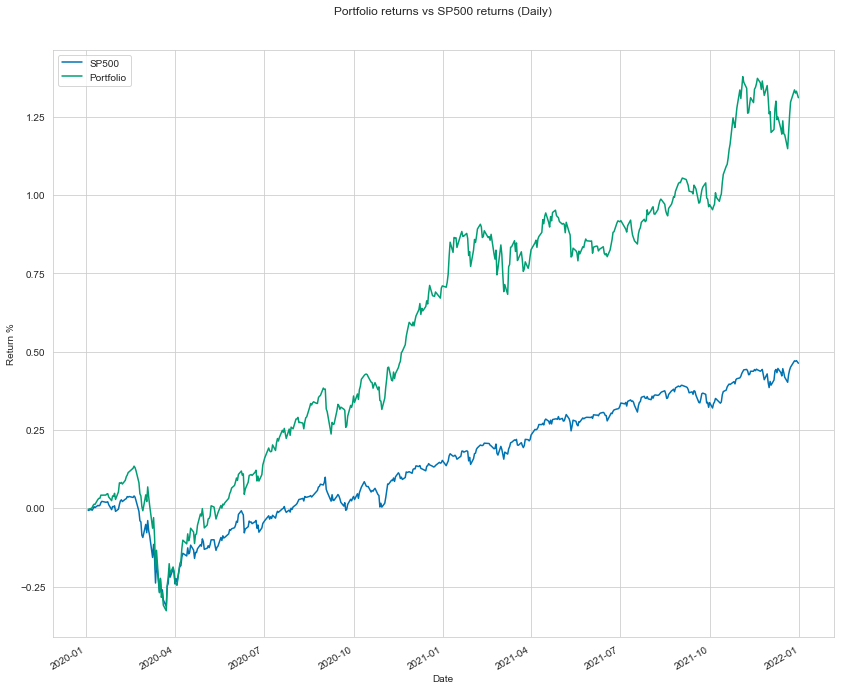

In [454]:
# Daily
cumulative_stock_returns[['SP500','Portfolio']].plot()

plt.title("Portfolio returns vs SP500 returns (Daily)", y=1.05)
plt.ylabel('Return %')

plt.gcf().set_size_inches(14, 12)
plt.show()

## Analyse Volatility for our Portfolio <a name="portfolio_volatility"></a>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightgreen">
    <font size=4><b> Correlations and Volatility </b></font> <br>
</div>

In [455]:
# To check if it is ok to use normal returns (stock_returns = share_prices_normalized.pct_change()) 
# or better to use log()

#stocks_returns_log = np.log(share_prices_normalized / share_prices_normalized.shift())

In [456]:
trading_days = 20
volatility = stock_returns.rolling(window=trading_days).std()*np.sqrt(trading_days)
#volatility = stocks_returns_log.rolling(window=trading_days).std()*np.sqrt(trading_days)

## Portfolio and SP500 - Share Price and Volatility  <a name="shareprice_volatility"></a>

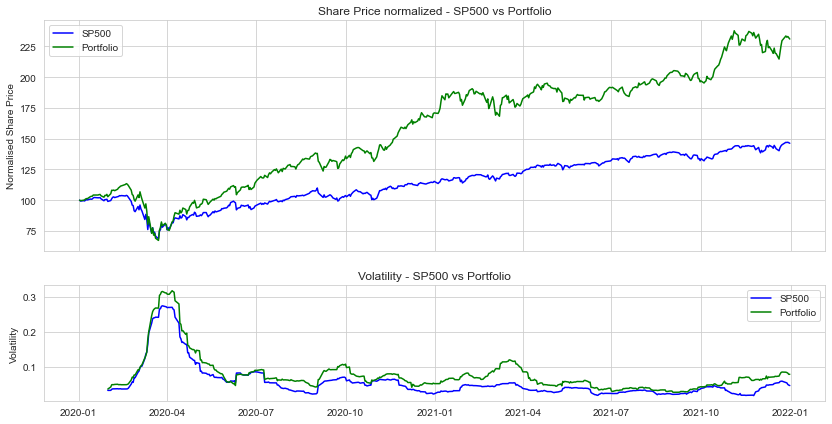

In [457]:
gridspec_kw = dict(
    height_ratios=(2, 1),
    hspace=0.2,
)

fig, ax = plt.subplots(
    nrows=2, ncols=1, sharex=True, gridspec_kw=gridspec_kw,
)


ax[0].set_title("Share Price normalized - SP500 vs Portfolio")
ax[0].plot(share_prices_normalized['SP500'], color="blue", label='SP500')
ax[0].plot(share_prices_normalized['Portfolio'], color="green", label='Portfolio')
ax[0].legend()
ax[0].set_ylabel('Normalised Share Price')

ax[1].set_title("Volatility - SP500 vs Portfolio")
ax[1].plot(volatility['SP500'], color="blue", label='SP500')
ax[1].plot(volatility['Portfolio'], color="green", label='Portfolio')
ax[1].legend()
ax[1].set_ylabel('Volatility')

plt.gcf().set_size_inches(14, 7)
plt.show()

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightgreen">
    <font size=4><b> Correlation and Risk for stocks of our Portfolio </b></font> <br>
</div>

In [458]:
# Create another df containing only the stocks of our portfolio (drop columns ['SP500', 'Portfolio'])
portfolio_stock_returns = stock_returns.drop(['SP500', 'Portfolio'], axis=1)
portfolio_stock_returns

,STE,MSFT,LH,WY,DGX,FISV,RMD,ETSY,AMCR,DISH,MCHP,PHM,CTVA,ANTM,FCX,POOL,ARE,TSLA,CVS,LDOS
Date,,,,,,,,,,,,,,,,,,,,
2020-01-03,-0.007054,-0.012452,-0.001493,0.001701,-0.005864,0.007358,-0.005253,-0.006417,-0.013170,0.003917,-0.021933,0.008790,-0.011830,-0.013262,-0.030303,0.005753,0.005697,0.029633,-0.007956,0.008720
2020-01-06,0.006572,0.002585,0.013096,-0.002038,0.005423,0.004812,0.004765,-0.001448,-0.006673,-0.006689,-0.014348,0.007432,-0.001408,0.012025,0.003906,0.000186,0.002428,0.019255,0.003942,0.008846
2020-01-07,-0.003825,-0.009118,-0.001535,-0.006467,-0.011450,-0.003848,-0.005640,0.021077,-0.008637,-0.002806,0.067097,0.006614,0.003879,-0.003029,0.015564,-0.009578,-0.032727,0.038801,-0.003791,-0.003687
2020-01-08,-0.000596,0.015928,0.027666,0.003768,0.004116,0.002747,0.007219,-0.016929,0.003872,-0.001407,-0.012648,0.009098,0.008079,0.026507,0.009962,0.005070,0.013290,0.049205,-0.012503,-0.001200
2020-01-09,0.005498,0.012493,0.006155,0.008191,0.012298,0.008562,0.008383,0.031663,0.002893,0.002536,0.009424,-0.003005,0.001045,-0.003480,-0.016692,0.001915,-0.003548,-0.021945,0.002752,0.012116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.016219,0.023186,0.016230,0.026398,0.013768,-0.015160,0.012557,0.006927,0.012865,0.000304,0.027838,0.013358,0.012274,0.008361,0.020909,0.020486,0.011350,0.025248,0.010759,0.005953
2021-12-28,-0.004858,-0.003504,0.000619,0.005043,-0.000059,0.007312,-0.004503,-0.034571,0.004234,-0.000912,-0.014773,0.016251,0.007871,0.010206,0.000000,0.000535,0.008587,-0.005000,0.003613,0.004438
2021-12-29,-0.006030,0.002051,0.005440,0.020572,0.004547,-0.004107,0.000843,0.000812,0.007588,-0.011872,0.002386,0.024343,-0.000633,0.007454,-0.000238,0.011440,0.007117,-0.002095,0.009049,0.001133


In [459]:
# We'll use joinplot to compare the daily returns of 2 stocks
# sns.jointplot(data=portfolio_stock_returns, x=portfolio_tickers[0], y=portfolio_tickers[1], kind='scatter', color='seagreen')

# plt.gcf().set_size_inches(14, 7)
# plt.show()

In [460]:
# sns.pairplot on our DataFrame for an automatic visual analysis of all the comparisons
# sns.pairplot(portfolio_stock_returns, kind='reg')
# plt.show()

## Portfolio stocks Correlation  <a name="portfolio_stocks_correlation"></a>

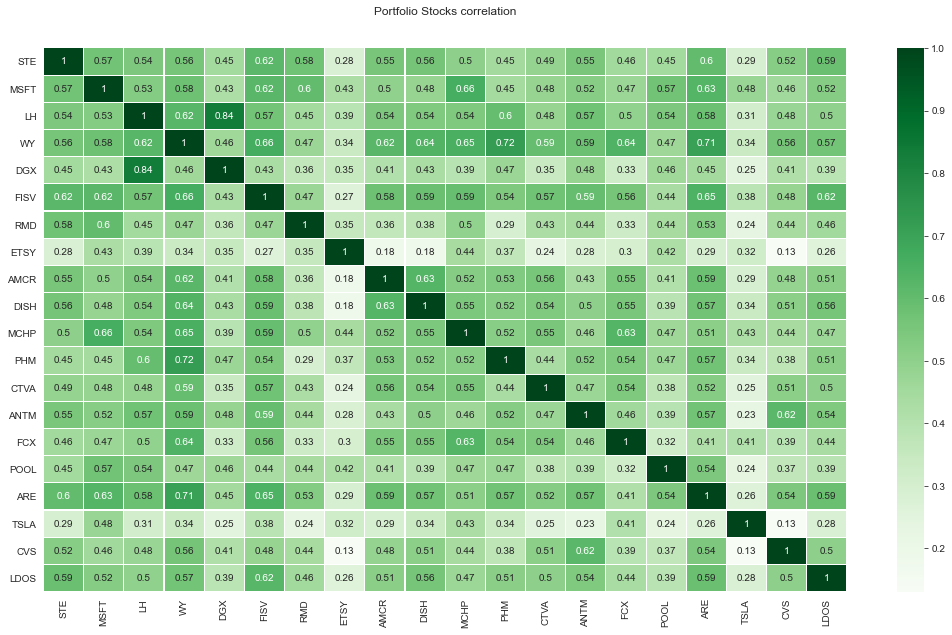

In [461]:
# Correlation plot for the daily returns
sns.heatmap(portfolio_stock_returns.corr(), annot=True, cmap='Greens', linewidths=0.1)
# plt.yticks(rotation=0) 
# plt.xticks(rotation=90) 

plt.title('Portfolio Stocks correlation', y=1.05)

plt.gcf().set_size_inches(18, 10)
plt.show()

## Expected Return vs Risk for stocks in our Portfolio  <a name="portfolio_return_risk"></a>

In [462]:
# Daily
# Expected Return vs Risk for stocks in our Portfolio

# plt.scatter(portfolio_stock_returns.mean(), portfolio_stock_returns.std(), color='grey')
# plt.title("Expected Return vs Risk for stocks in our Portfolio (Daily)", y=1.05)

# plt.xlabel('Average expected return')
# plt.ylabel('Risk')

# plt.gcf().set_size_inches(15, 8)

# for label, x, y in zip(portfolio_stock_returns.columns, portfolio_stock_returns.mean(), portfolio_stock_returns.std()):
#      plt.annotate(label, xy=(x, y), xytext=(15, 20), textcoords='offset pixels', #ha='right', va='bottom', 
#                   arrowprops=dict(arrowstyle='-', color='grey', connectionstyle='angle,angleA=-90,angleB=10,rad=5'))

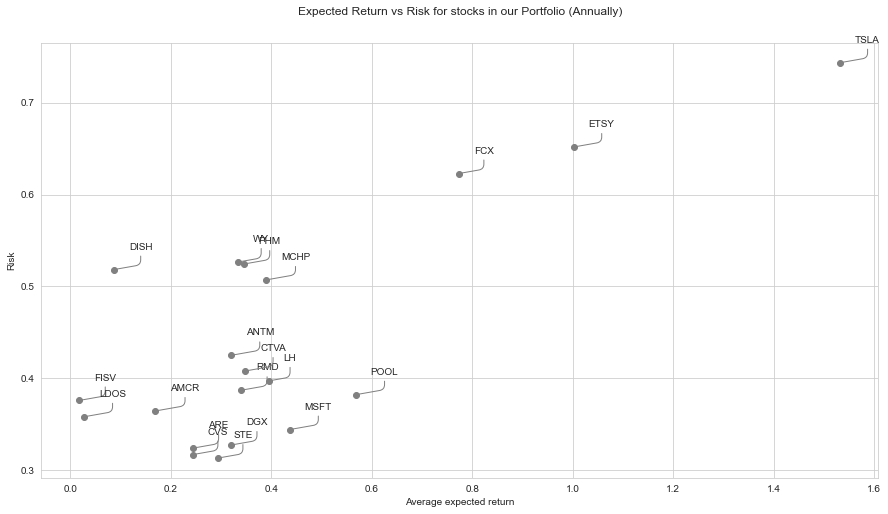

In [463]:
# Annually - 252 trading days per year
# Expected Return vs Risk for stocks in our Portfolio

plt.scatter(portfolio_stock_returns.mean()*252, portfolio_stock_returns.std()*np.sqrt(252), color='grey')
plt.title("Expected Return vs Risk for stocks in our Portfolio (Annually)", y=1.05)

plt.xlabel('Average expected return')
plt.ylabel('Risk')

plt.gcf().set_size_inches(15, 8)

for label, x, y in zip(portfolio_stock_returns.columns, portfolio_stock_returns.mean()*252, portfolio_stock_returns.std()*np.sqrt(252)):
     plt.annotate(label, xy=(x, y), xytext=(15, 20), textcoords='offset pixels', #ha='right', va='bottom', 
                  arrowprops=dict(arrowstyle='-', color='grey', connectionstyle='angle,angleA=-90,angleB=10,rad=5'))

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightgreen">
    <font size=4><b> Volatility of our Portfolio </b></font> <br>
</div>

In [464]:
# Standard deviation for each stock
portfolio_stock_returns.std()

STE     0.019729
MSFT    0.021682
LH      0.025019
WY      0.033170
DGX     0.020623
FISV    0.023679
RMD     0.024374
ETSY    0.041056
AMCR    0.022957
DISH    0.032651
MCHP    0.031940
PHM     0.033028
CTVA    0.025697
ANTM    0.026766
FCX     0.039238
POOL    0.024072
ARE     0.020413
TSLA    0.046837
CVS     0.019964
LDOS    0.022558
dtype: float64

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightblue">
    <font size=4><b> The formula for the Portfolio volatility is: </b></font> <br><br>
    <font size=2><b> Vol = sqrt (w.T · cov · w) </b></font> <br><br>
    <font size=2><b> - Vol: Portfolio volatility <br>
                     - sqrt: Square root <br>
                     - w: Portfolio weights (w.T is transposed portfolio weights) <br>
                     - cov: Covariance matrix of returns <br>
                     - ·: The dot-multiplication operator (np.dot() function is the dot-product of two arrays) <br>
        </b></font> <br>
</div>

In [465]:
portfolio_weights 

array([0.        , 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.04678363, 0.04678363, 0.04678363,
       0.04678363, 0.04678363, 0.04678363, 0.04678363, 0.04678363,
       0.04678363])

In [466]:
# drop first value, previously added as 0 for SP500
portfolio_weights = portfolio_weights[1:]
portfolio_weights

array([0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.04678363, 0.04678363, 0.04678363, 0.04678363,
       0.04678363, 0.04678363, 0.04678363, 0.04678363, 0.04678363])

In [467]:
cov_matrix_d = portfolio_stock_returns.cov()
cov_matrix_y = cov_matrix_d * 252

# calculate the variance and risk of the portfolo
portfolio_variance = np.dot(portfolio_weights.T, np.dot(cov_matrix_y, portfolio_weights))
portfolio_volatility = np.sqrt(portfolio_variance)

print("Portfolio Variance:   {:.02f} %".format(portfolio_variance *100))
print("Portfolio Volatility: {:.02f} %".format(portfolio_volatility *100))

Portfolio Variance:   9.41 %
Portfolio Volatility: 30.67 %


<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightgreen">
    <font size=4><b> Volatility of SP500 </b></font> <br>
</div>

In [468]:
# sp500_stocks_returns: returns for all SP500 stocks
# sp500_stocks_info: info of all SP500 stocks (including col Weight)
sp500_weights = pd.DataFrame(sp500_stocks_returns.columns)
sp500_weights.columns = ['Ticker']

In [469]:
# left join to keep all the tickers in the same order of sp500_stocks_returns
sp500_weights = sp500_weights.merge(sp500_stocks_info[['Symbol','Weight']], 
                                    left_on='Ticker', right_on='Symbol', how='left')

In [470]:
sp500_weights.drop(['Symbol'], axis=1, inplace=True)

In [471]:
sp500_weights

,Ticker,Weight
0,A,0.000929
1,AAL,0.000331
2,AAP,0.000345
3,AAPL,0.067326
4,ABBV,0.006944
...,...,...
496,ZBH,0.000666
497,ZBRA,0.000512
498,ZION,0.000241
499,ZTS,0.002183


In [472]:
sp500_weights['Weight'].sum()

0.9980855986973577

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:cyan">
    <font size=4> Some tickers didn't match in the join but we are still very close to 100% to try to calculate the SP500 volatility </font> <br>
</div>

In [473]:
columns_to_drop = sp500_weights.loc[sp500_weights['Weight'].isna()]['Ticker'].to_list()

In [474]:
columns_to_drop

['APA', 'PARA', 'SBUX', 'V', 'WBD', 'WTW', 'S&P500']

In [475]:
sp500_weights.shape

(501, 2)

In [476]:
sp500_stocks_returns.shape

(505, 501)

In [477]:
# dropping null to remove the Ticker in Row withouth weight
sp500_weights.dropna(inplace=True)

In [478]:
# deleting the columns (Ticker in Col)
sp500_stocks_returns_trunc = sp500_stocks_returns.drop(columns_to_drop, axis=1)
sp500_stocks_returns_trunc.dropna(axis = 0, inplace = True)

In [479]:
sp500_weights.shape

(494, 2)

In [480]:
sp500_stocks_returns_trunc.shape

(504, 494)

In [481]:
sp500_weights['Ticker'].to_list() == sp500_stocks_returns_trunc.columns.to_list()

True

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:cyan">
    <font size=4> Dropped the columns fow which the tickers was not matched in the join </font> <br>
    <font size=4> Both dataframes have the same number of tickers now in the same order </font> <br>
</div>

In [482]:
# Standard deviation for each stock
sp500_stocks_returns_trunc.std()

A       0.018713
AAL     0.050968
AAP     0.023681
AAPL    0.023604
ABBV    0.017941
          ...   
YUM     0.021273
ZBH     0.024823
ZBRA    0.025367
ZION    0.030913
ZTS     0.019519
Length: 494, dtype: float64

In [483]:
# Getting the weights for SP500 stocks in the index in an array
sp500_weights = np.asarray(sp500_weights['Weight'].to_list())
# sp500_stocks_returns_trunc: returns of all SP500 stocks

In [484]:
#sp500_stocks_returns_trunc

In [485]:
sp_cov_matrix_d = sp500_stocks_returns_trunc.cov()
sp_cov_matrix_y = sp_cov_matrix_d * 252

# calculate the variance and risk of the portfolo
sp500_variance = np.dot(sp500_weights.T, np.dot(sp_cov_matrix_y, sp500_weights))
sp500_volatility = np.sqrt(sp500_variance)

print("SP500 Variance:   {:.02f} %".format(sp500_variance *100))
print("SP500 Volatility: {:.02f} %".format(sp500_volatility *100))

SP500 Variance:   7.06 %
SP500 Volatility: 26.57 %


## Volatility of our new Portfolio vs SP500  <a name="portfolio_sp_volatility"></a>

<div class ="alert alert-block alert-info" style="font-family:Calibri Light;text-align:left;background-color:lightgreen">
    <font size=4><b> Volatility of our new Portfolio vs SP500 </b></font> <br>
</div>

In [486]:
print("SP500 Return Cumulative ({}-{}):     {:.02f} %".format(year_to_analyze, year_to_analyze+1, cumulative_stock_returns.iloc[-1]['SP500'] *100))
print("SP500 Variance:                          {:.02f} %".format(sp500_variance *100))
print("SP500 Volatility:                        {:.02f} %".format(sp500_volatility *100))
print('--')
print("Portfolio Return Cumulative ({}-{}): {:.02f} %".format(year_to_analyze, year_to_analyze+1, cumulative_stock_returns.iloc[-1]['Portfolio'] *100))
print("Portfolio Variance:                      {:.02f} %".format(portfolio_variance *100))
print("Portfolio Volatility:                    {:.02f} %".format(portfolio_volatility *100))

SP500 Return Cumulative (2020-2021):     46.30 %
SP500 Variance:                          7.06 %
SP500 Volatility:                        26.57 %
--
Portfolio Return Cumulative (2020-2021): 131.06 %
Portfolio Variance:                      9.41 %
Portfolio Volatility:                    30.67 %
